In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid") 
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["figure.dpi"] = 600
plt.rcParams["savefig.dpi"] = 1200
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12

In [82]:
df_avg = pd.read_csv("2_1_avg_ride_length.csv") 
df_avg

member_casual  avg_ride_length_min
0        casual                20.70
1        member                12.06

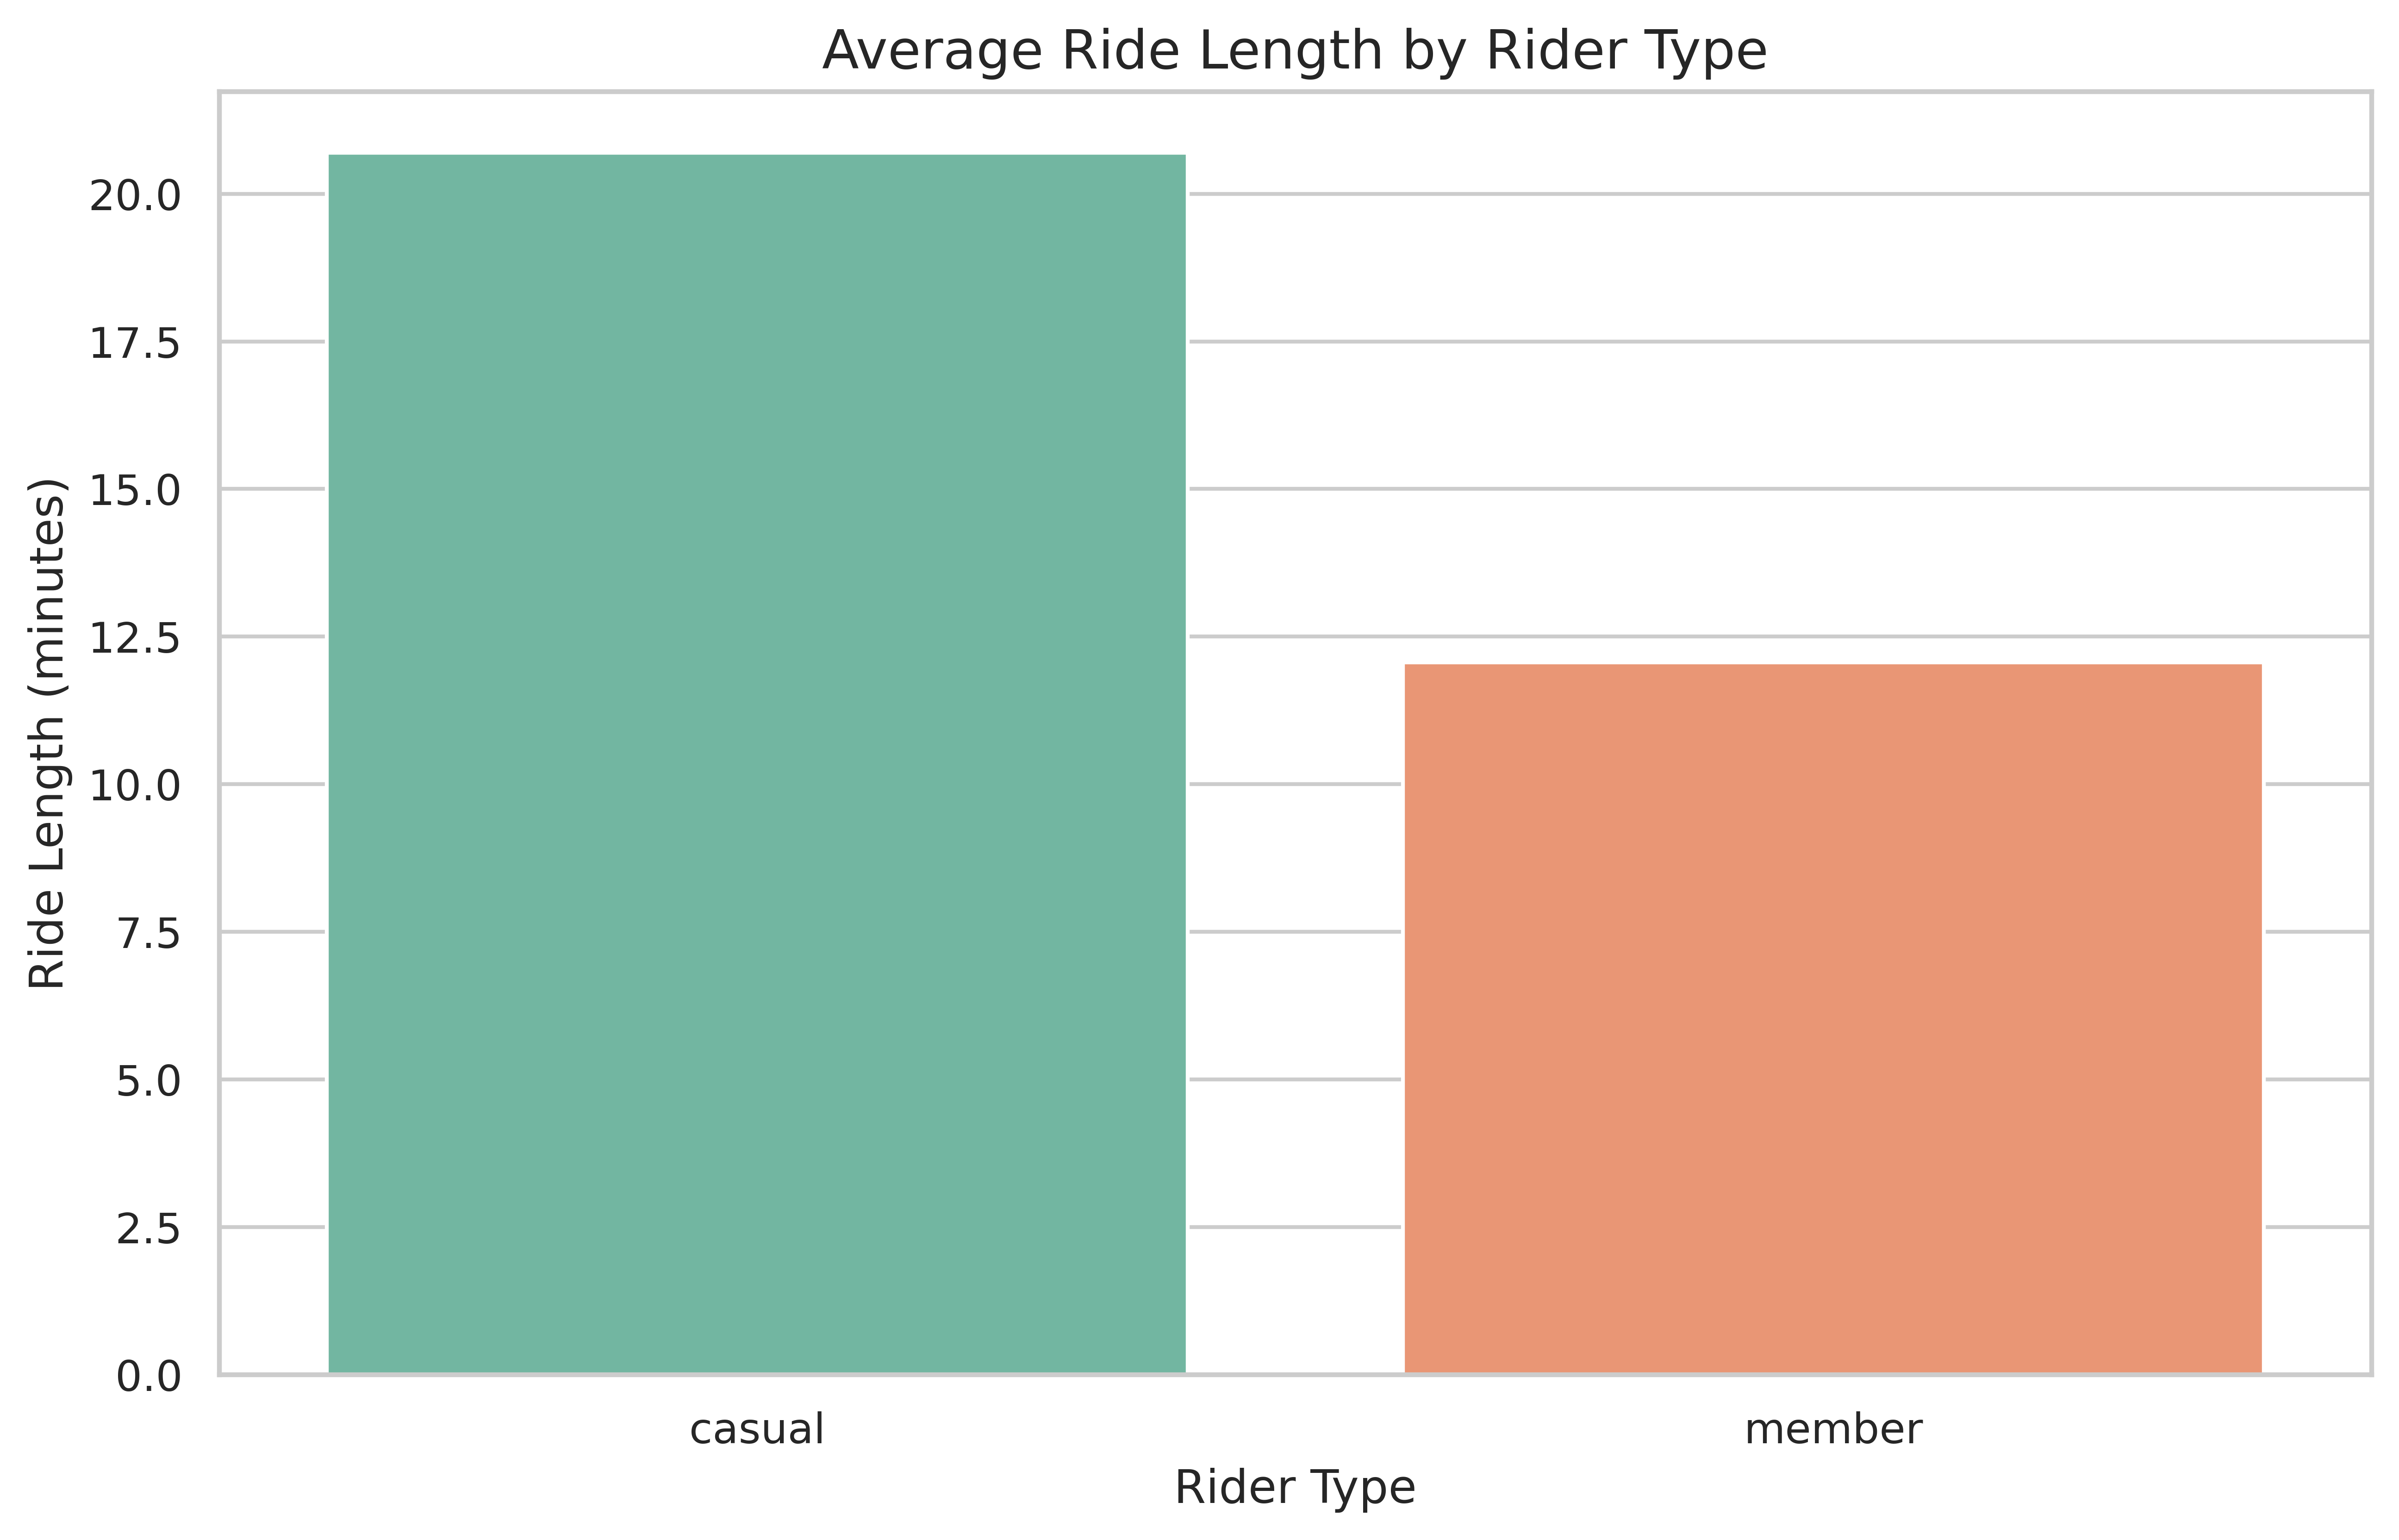

In [83]:
sns.barplot(data=df_avg, x="member_casual", y="avg_ride_length_min", palette="Set2")
plt.title("Average Ride Length by Rider Type")
plt.ylabel("Ride Length (minutes)")
plt.xlabel("Rider Type")
plt.show()

In [84]:
df = pd.read_csv("2_2_ride_length_distribution.csv")
df

ride_length_category member_casual  total_trips
0                 Long        casual       222386
1                 Long        member       178937
2               Medium        casual       479427
3               Medium        member       672357
4                Short        casual       914244
5                Short        member      1853141
6            Very Long        casual       109649
7            Very Long        member        24958
8           Very Short        casual       327652
9           Very Short        member       929439

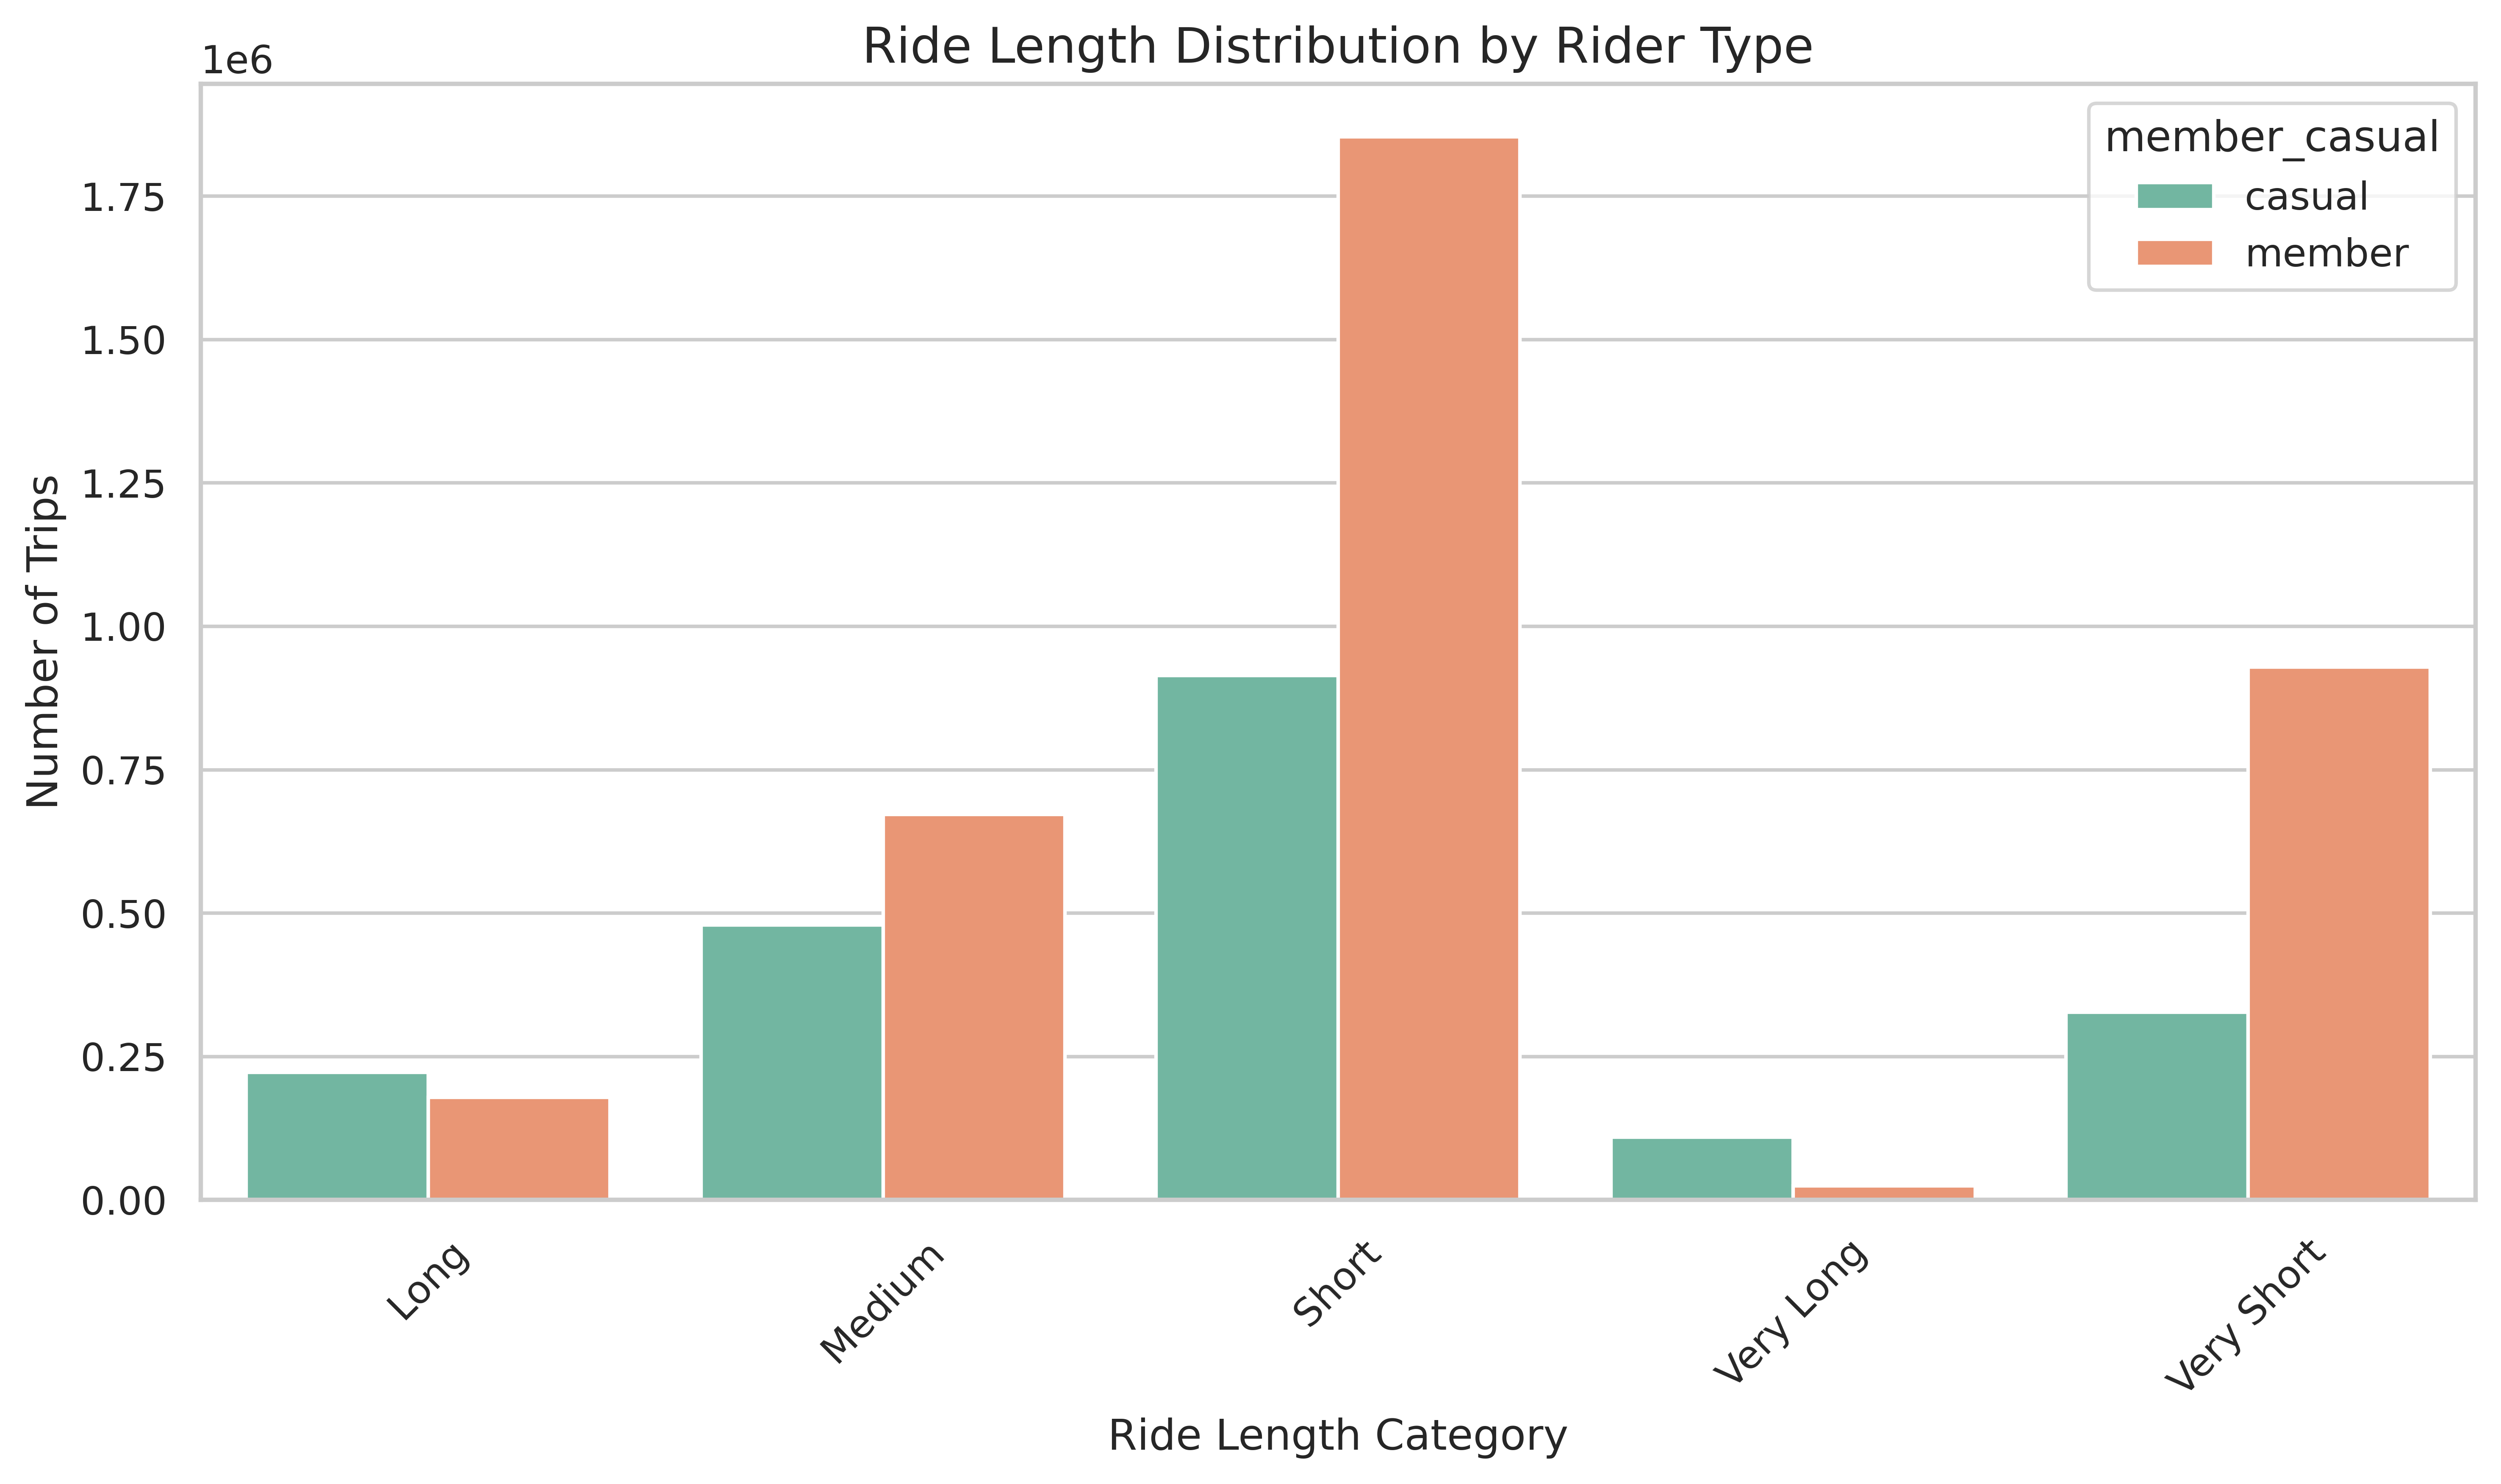

In [85]:
sns.barplot(
    data=df,
    x="ride_length_category",
    y="total_trips",
    hue="member_casual",
    palette="Set2"
)

plt.title("Ride Length Distribution by Rider Type")
plt.xlabel("Ride Length Category")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [86]:
df_std = pd.read_csv("2_3_variability.csv")
df_std

member_casual  avg_len  std_len
0        casual    20.90     44.1
1        member    12.17     21.0

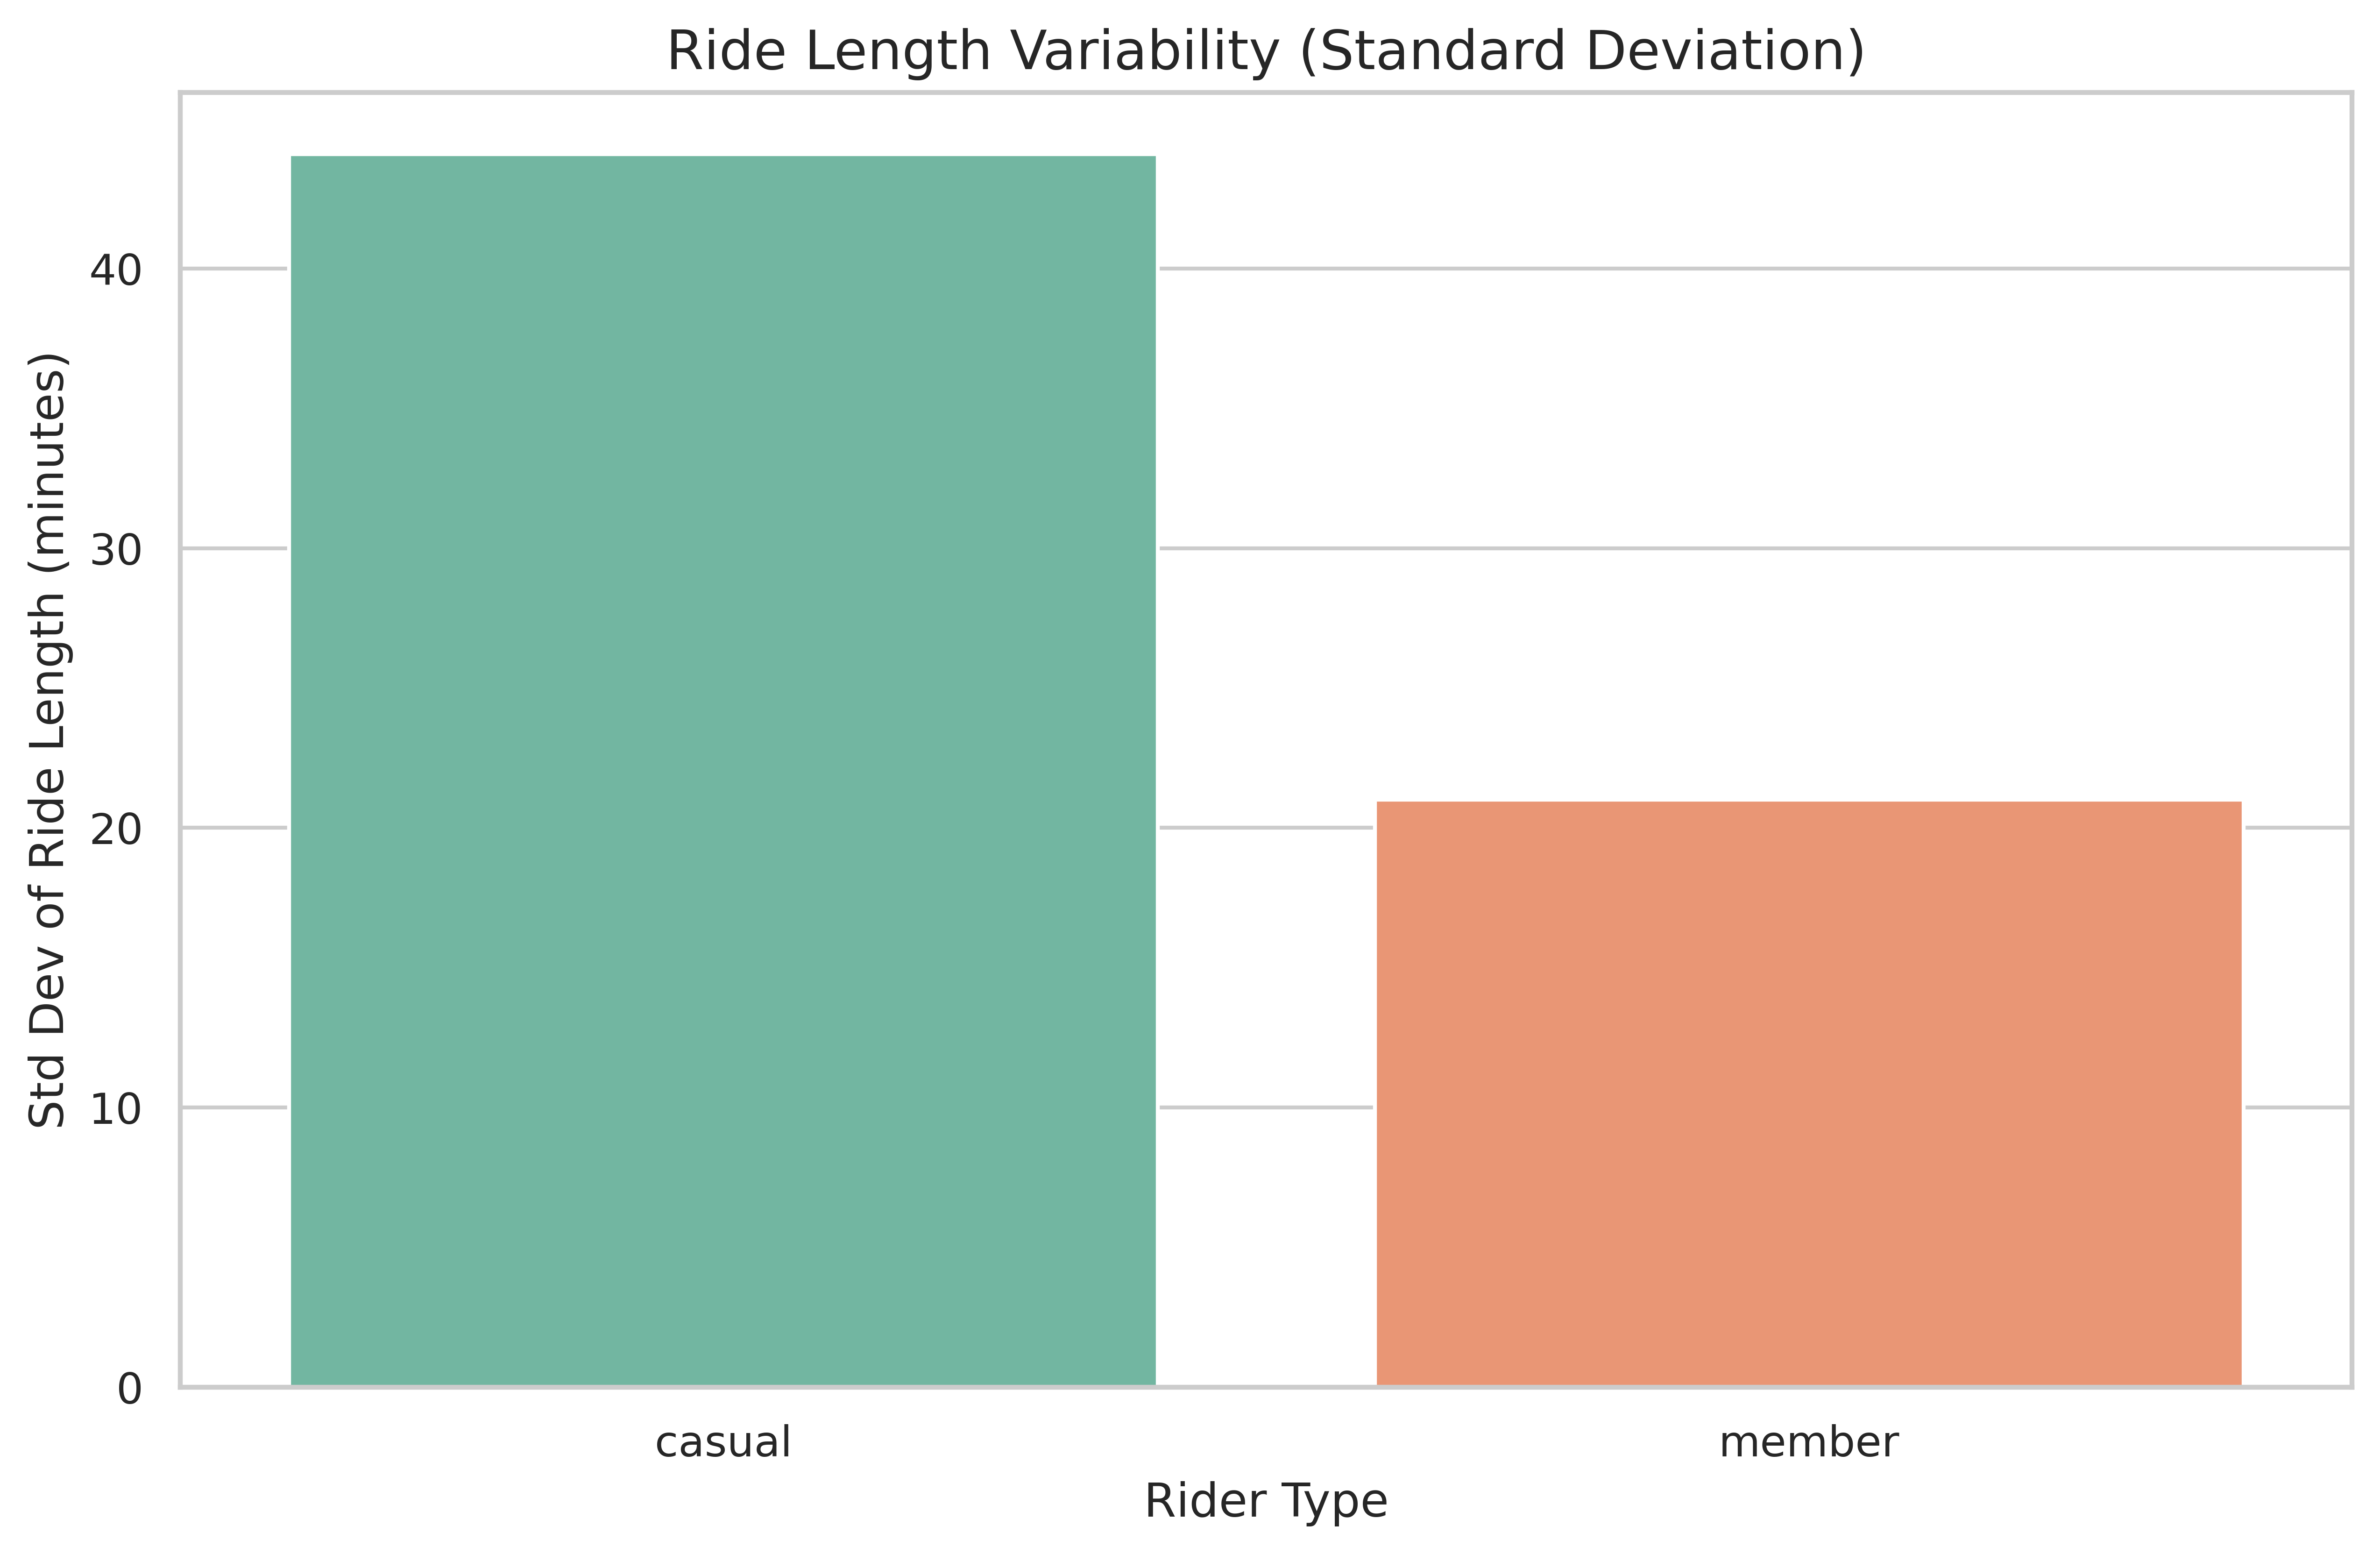

In [87]:
sns.barplot(data=df_std, x="member_casual", y="std_len", palette="Set2")
plt.title("Ride Length Variability (Standard Deviation)")
plt.ylabel("Std Dev of Ride Length (minutes)")
plt.xlabel("Rider Type")
plt.show()

In [88]:
df_hour = pd.read_csv("3_1_hour_of_day.csv")
df_hour.head()

hour_of_day member_casual  count
0            0        casual  36709
1            0        member  35506
2            1        casual  23778
3            1        member  21145
4            2        casual  14361

/home/suanto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/suanto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/suanto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/suanto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-

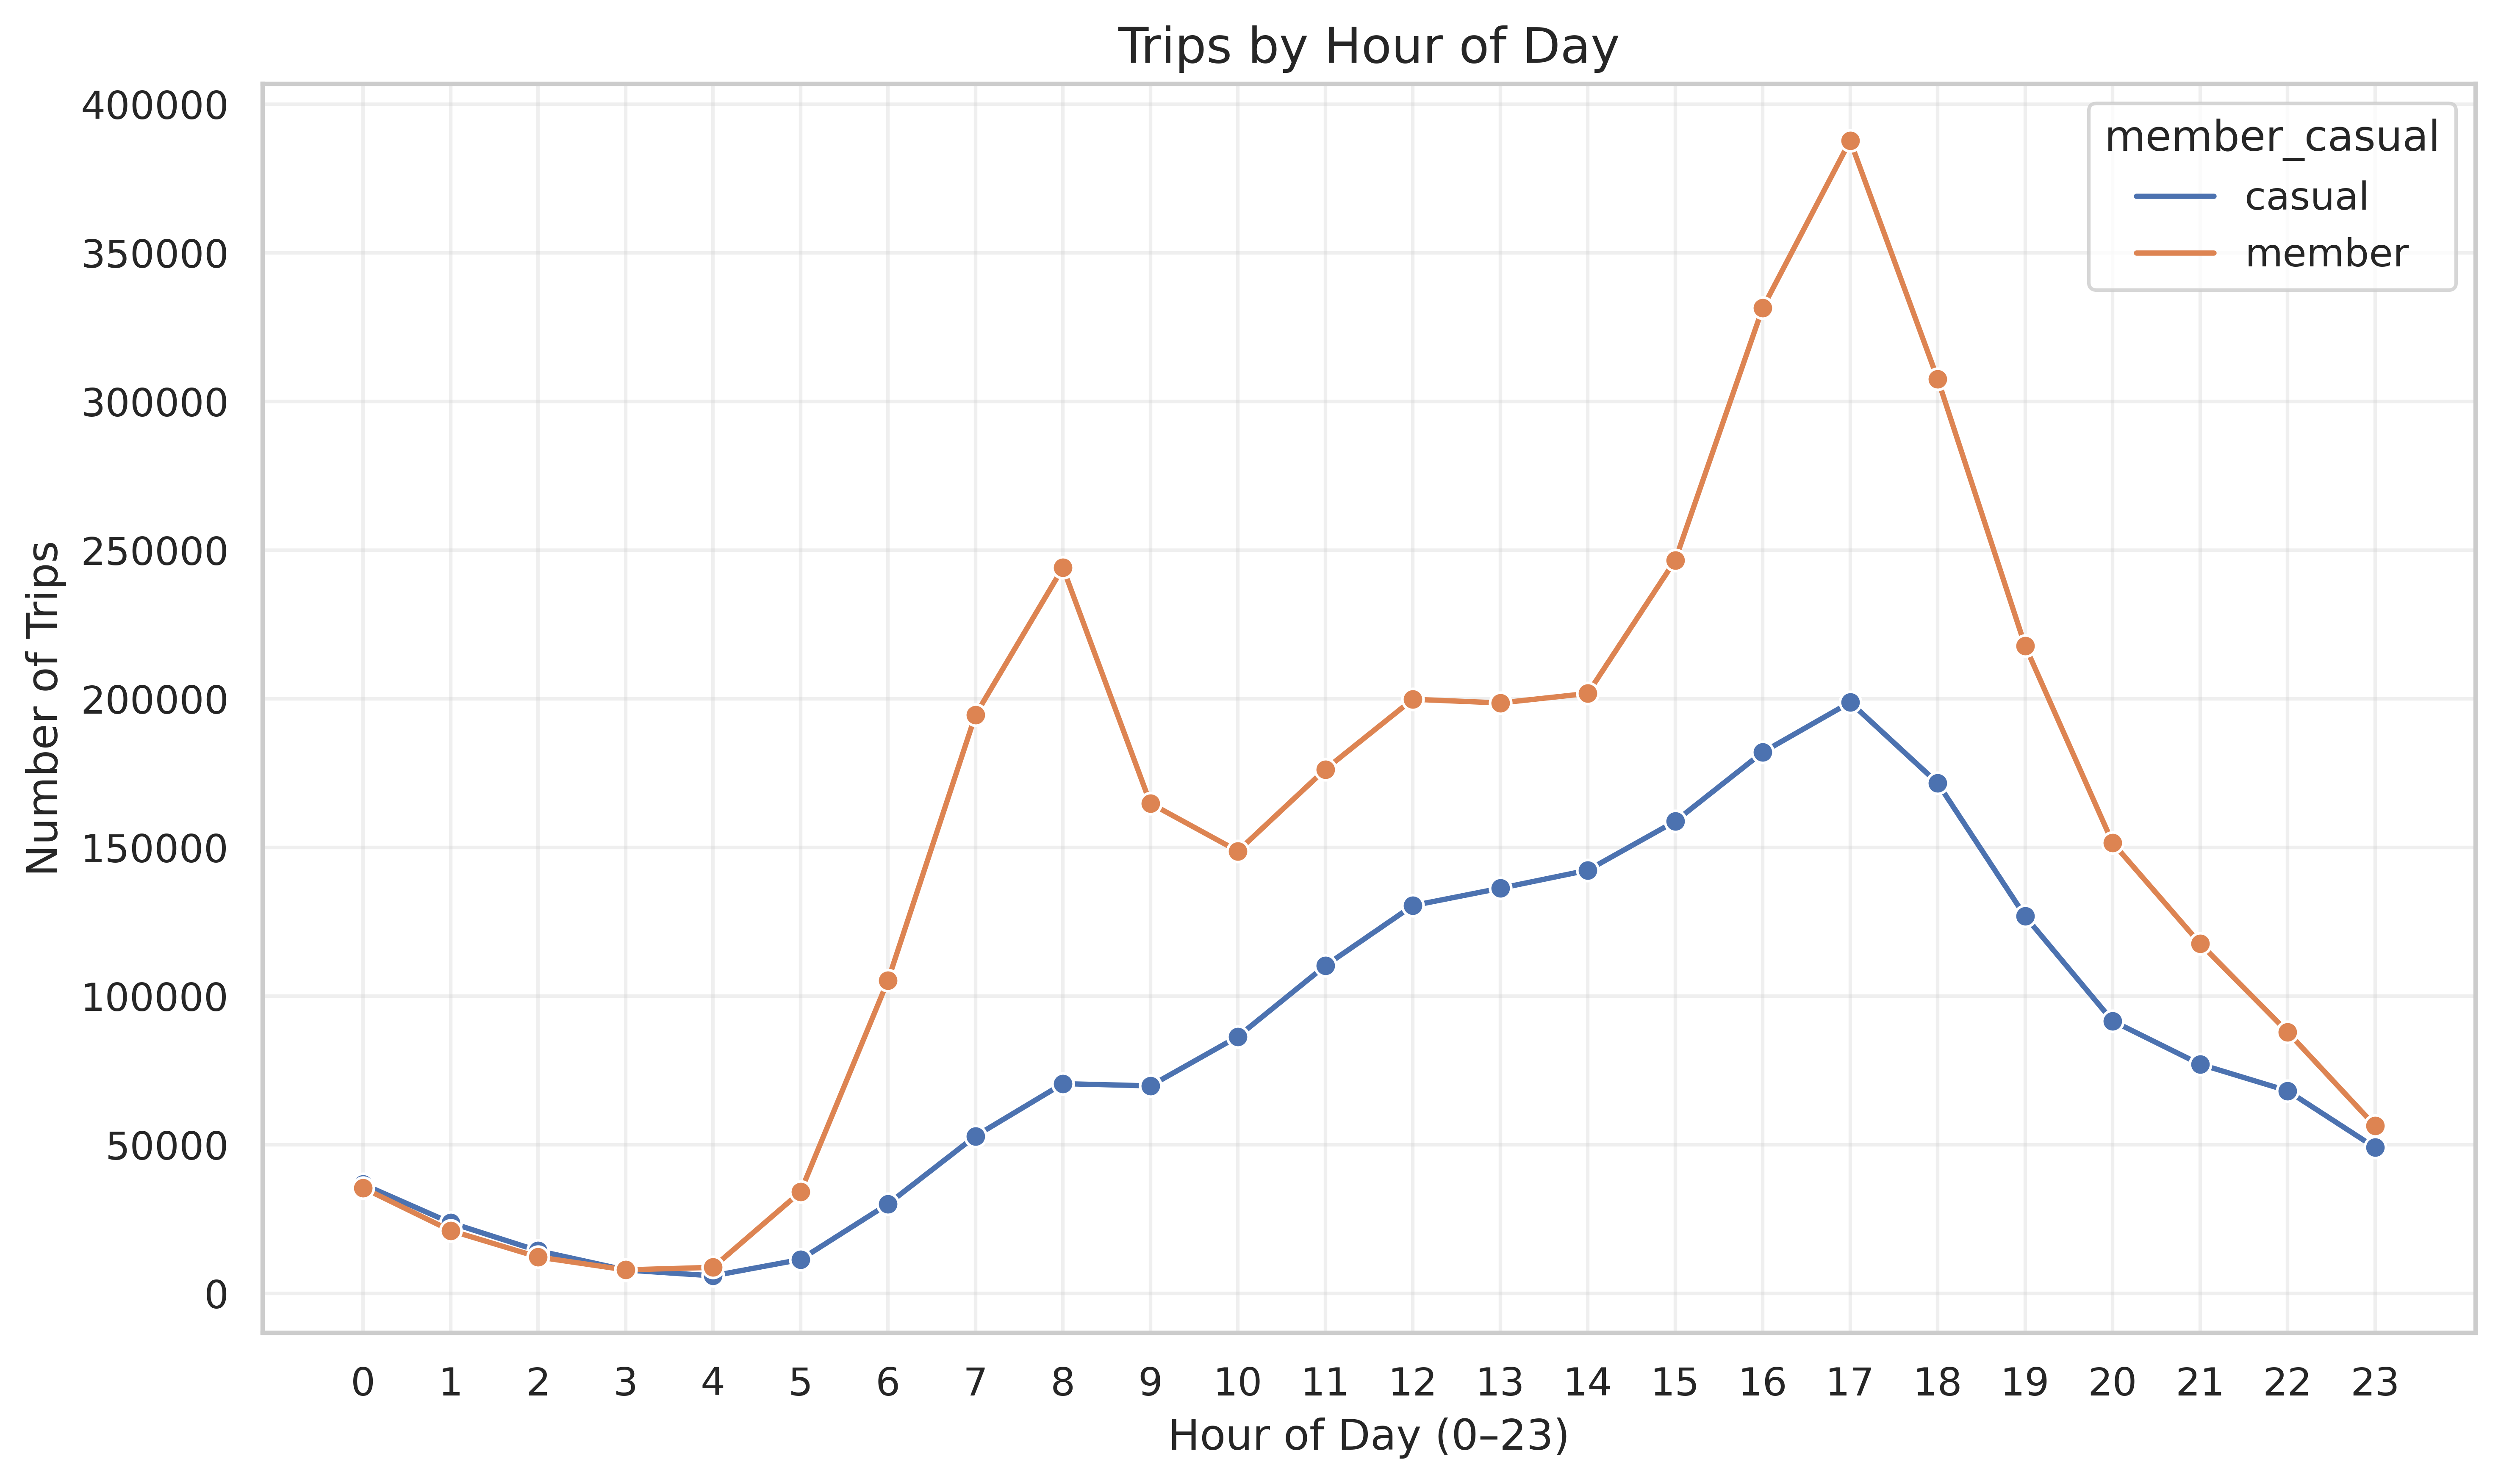

In [89]:
sns.lineplot(
    data=df_hour,
    x="hour_of_day",
    y="count",
    hue="member_casual",
    marker="o"
)

plt.title("Trips by Hour of Day")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Trips")
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [90]:
df_dow = pd.read_csv("3_2_day_of_week.csv")
df_dow["day_of_week"].unique()

array(['Friday   ', 'Monday   ', 'Saturday ', 'Sunday   ', 'Thursday ',
       'Tuesday  ', 'Wednesday'], dtype=object)

In [91]:
df_dow["day_of_week"] = df_dow["day_of_week"].str.strip()        # remove spaces
df_dow["day_of_week"] = df_dow["day_of_week"].str.capitalize()   # Monday

In [92]:
df_dow["day_of_week"] = pd.Categorical(
    df_dow["day_of_week"],
    categories=day_order,
    ordered=True
)

In [93]:
df_dow

day_of_week member_casual   count
0       Friday        casual  311076
1       Friday        member  531327
2       Monday        casual  234202
3       Monday        member  494330
4     Saturday        casual  409444
5     Saturday        member  472598
6       Sunday        casual  334556
7       Sunday        member  408614
8     Thursday        casual  269922
9     Thursday        member  589309
10     Tuesday        casual  245620
11     Tuesday        member  576462
12   Wednesday        casual  248538
13   Wednesday        member  586192

In [94]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_dow["day_of_week"] = pd.Categorical(
    df_dow["day_of_week"], 
    categories=day_order, 
    ordered=True
)

df_dow = df_dow.sort_values("day_of_week")
df_dow.head(20)

day_of_week member_casual   count
2       Monday        casual  234202
3       Monday        member  494330
10     Tuesday        casual  245620
11     Tuesday        member  576462
12   Wednesday        casual  248538
13   Wednesday        member  586192
8     Thursday        casual  269922
9     Thursday        member  589309
0       Friday        casual  311076
1       Friday        member  531327
4     Saturday        casual  409444
5     Saturday        member  472598
6       Sunday        casual  334556
7       Sunday        member  408614

/home/suanto/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/suanto/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


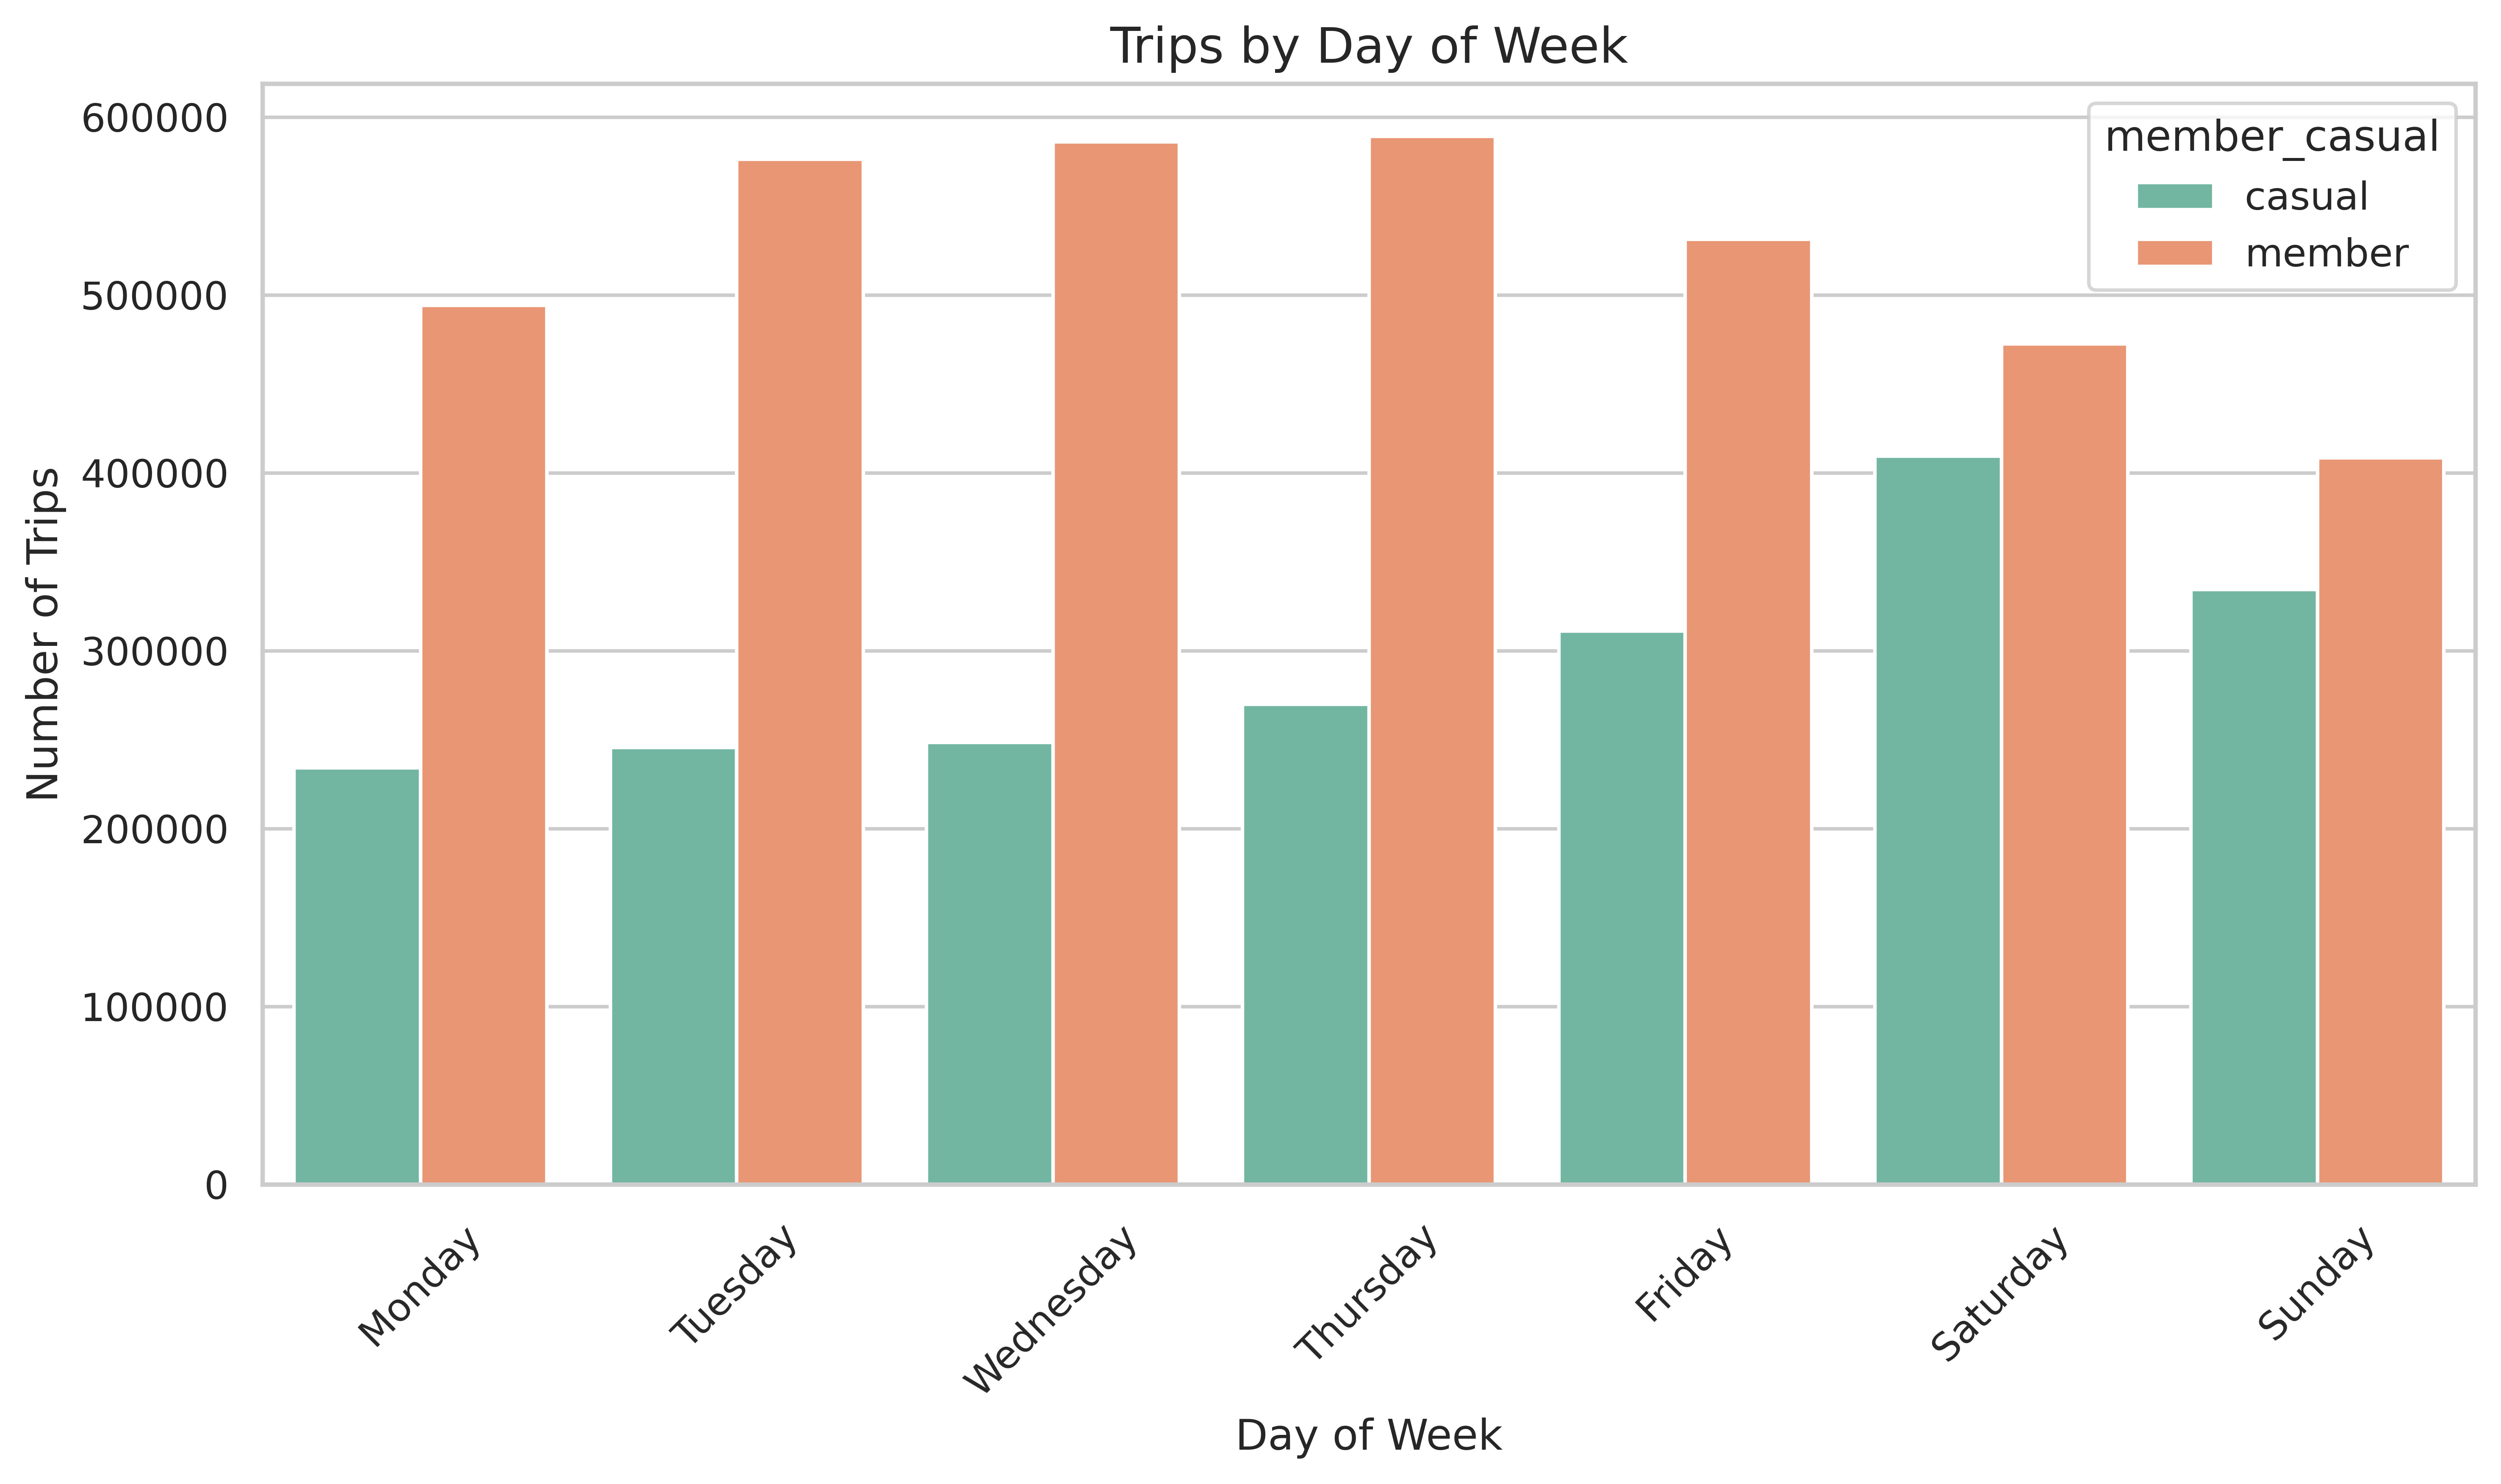

In [95]:
sns.barplot(
    data=df_dow,
    x="day_of_week",
    y="count",
    hue="member_casual",
    #order = day_order,
    palette="Set2"
)

plt.title("Trips by Day of Week")
plt.ylabel("Number of Trips")
plt.xlabel("Day of Week")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [96]:
df_season_count = pd.read_csv("4_1_seasonal_trip_counts.csv")  
df_season_count.head()

season member_casual    count
0    Fall        casual   535431
1    Fall        member  1028215
2  Spring        casual   442711
3  Spring        member   846157
4  Summer        casual   940891

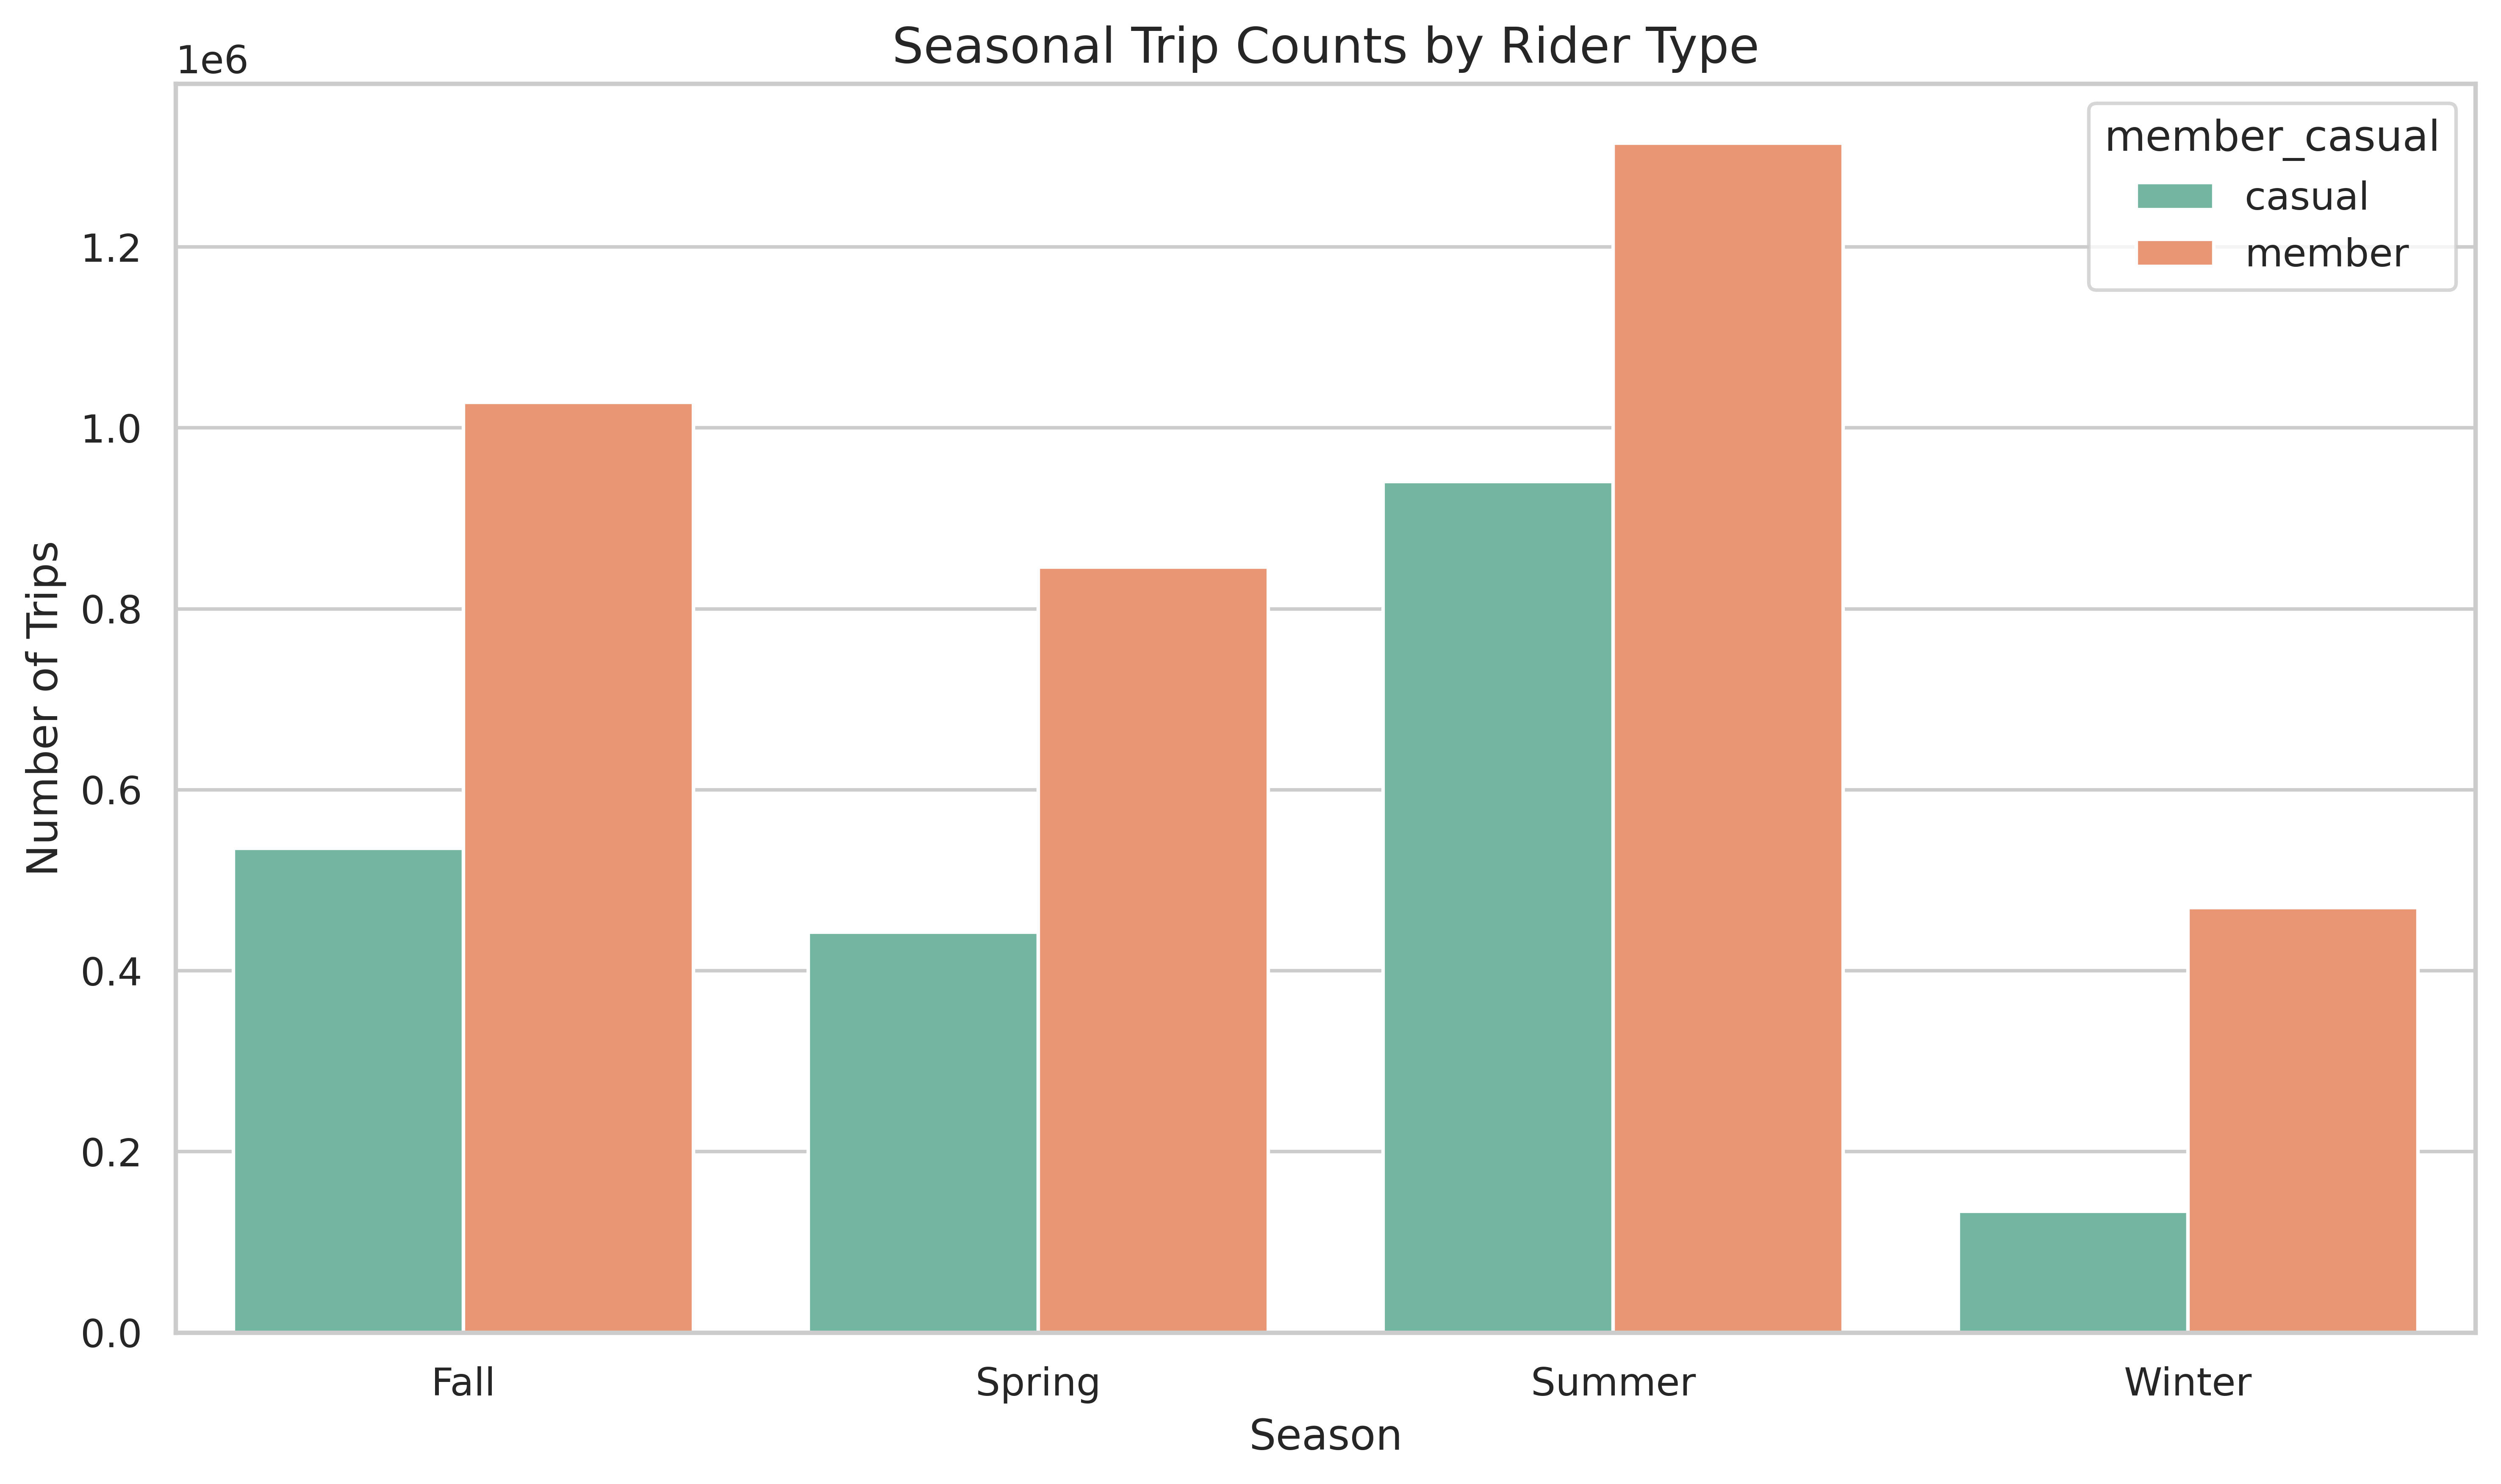

In [97]:
sns.barplot(
    data=df_season_count,
    x="season",
    y="count",
    hue="member_casual",
    palette="Set2"
)

plt.title("Seasonal Trip Counts by Rider Type")
plt.xlabel("Season")
plt.ylabel("Number of Trips")
plt.tight_layout()
plt.show()

In [98]:
df_season_avg = pd.read_csv("4_2_average_ride_length_by_season.csv")
df_season_avg.head()

season member_casual  round
0    Fall        casual  19.50
1    Fall        member  11.83
2  Spring        casual  20.72
3  Spring        member  11.65
4  Summer        casual  22.21

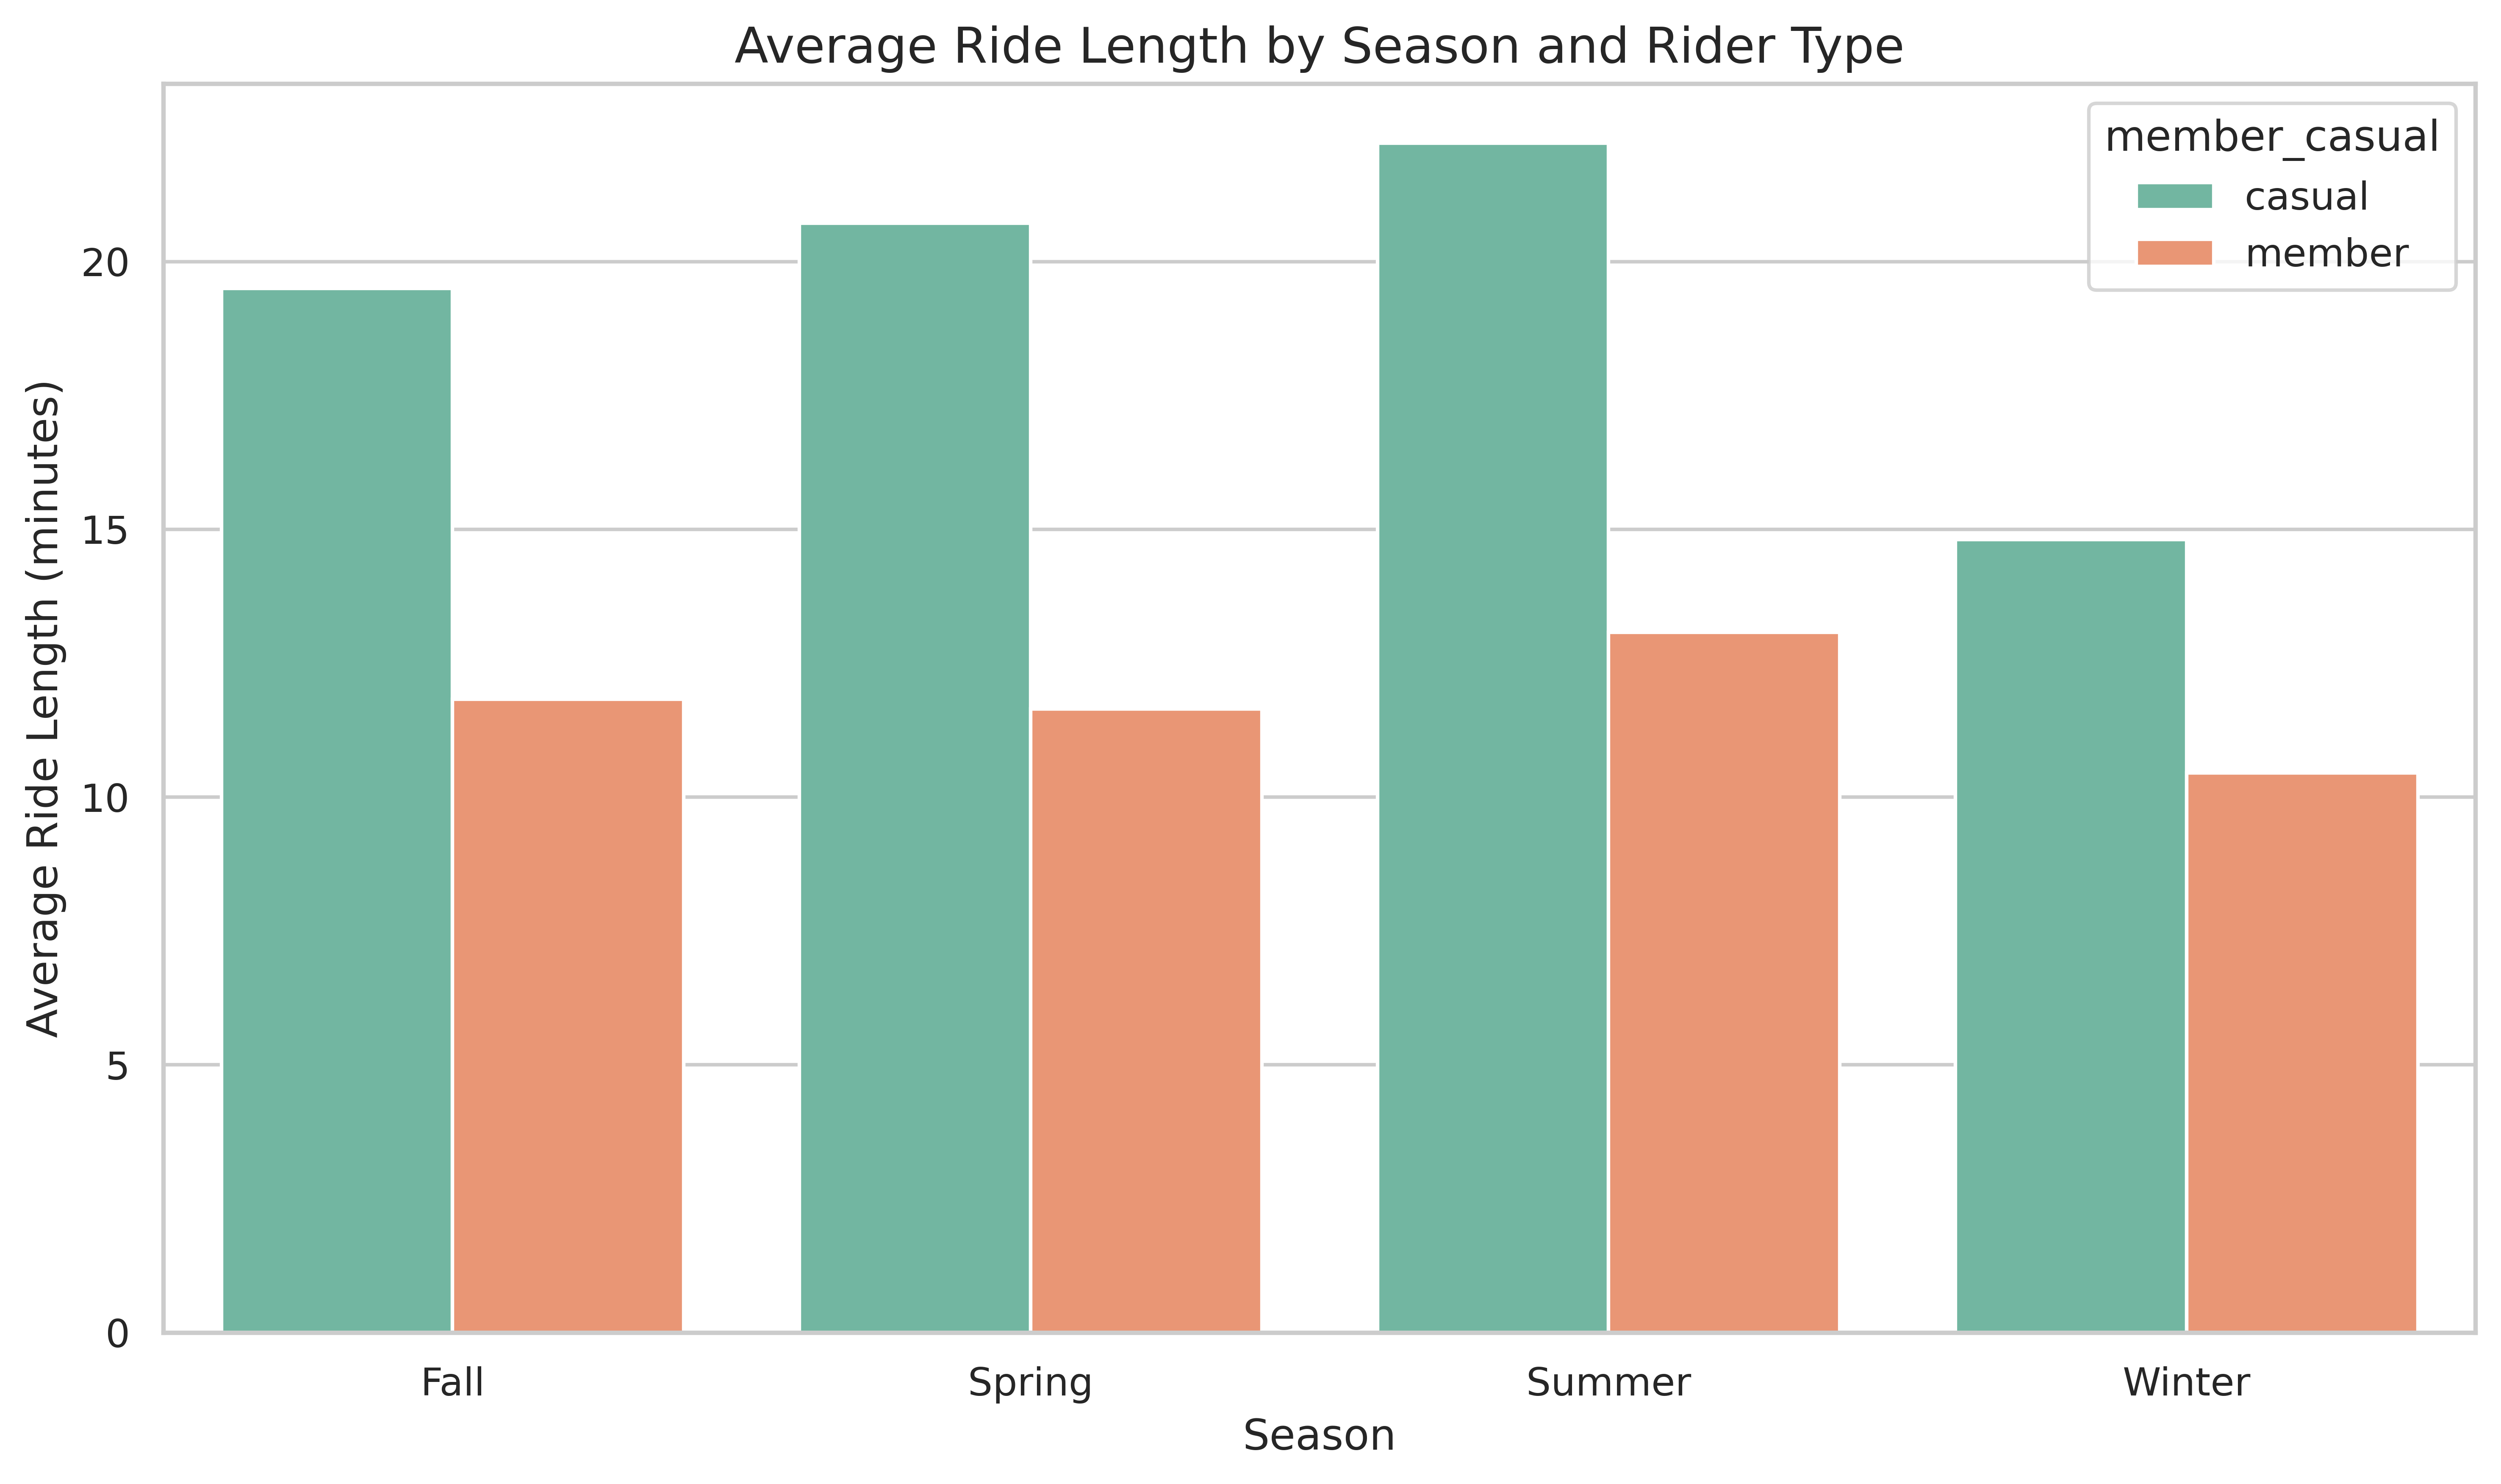

In [99]:
sns.barplot(
    data=df_season_avg,
    x="season",
    y="round",
    hue="member_casual",
    palette="Set2"
)

plt.title("Average Ride Length by Season and Rider Type")
plt.xlabel("Season")
plt.ylabel("Average Ride Length (minutes)")
plt.tight_layout()
plt.show()

In [101]:
df_month = pd.read_csv("5_monthly_trend.csv")  # rename to match your file
df_month.head()

trip_month member_casual   count
0           1        casual   39917
1           1        member  150258
2           2        casual   42930
3           2        member  147397
4           3        casual   62067

In [102]:
df_month["trip_month"] = pd.Categorical(
    df_month["trip_month"],
    categories=list(range(1,13)),
    ordered=True
)

/home/suanto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/suanto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/suanto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/suanto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-

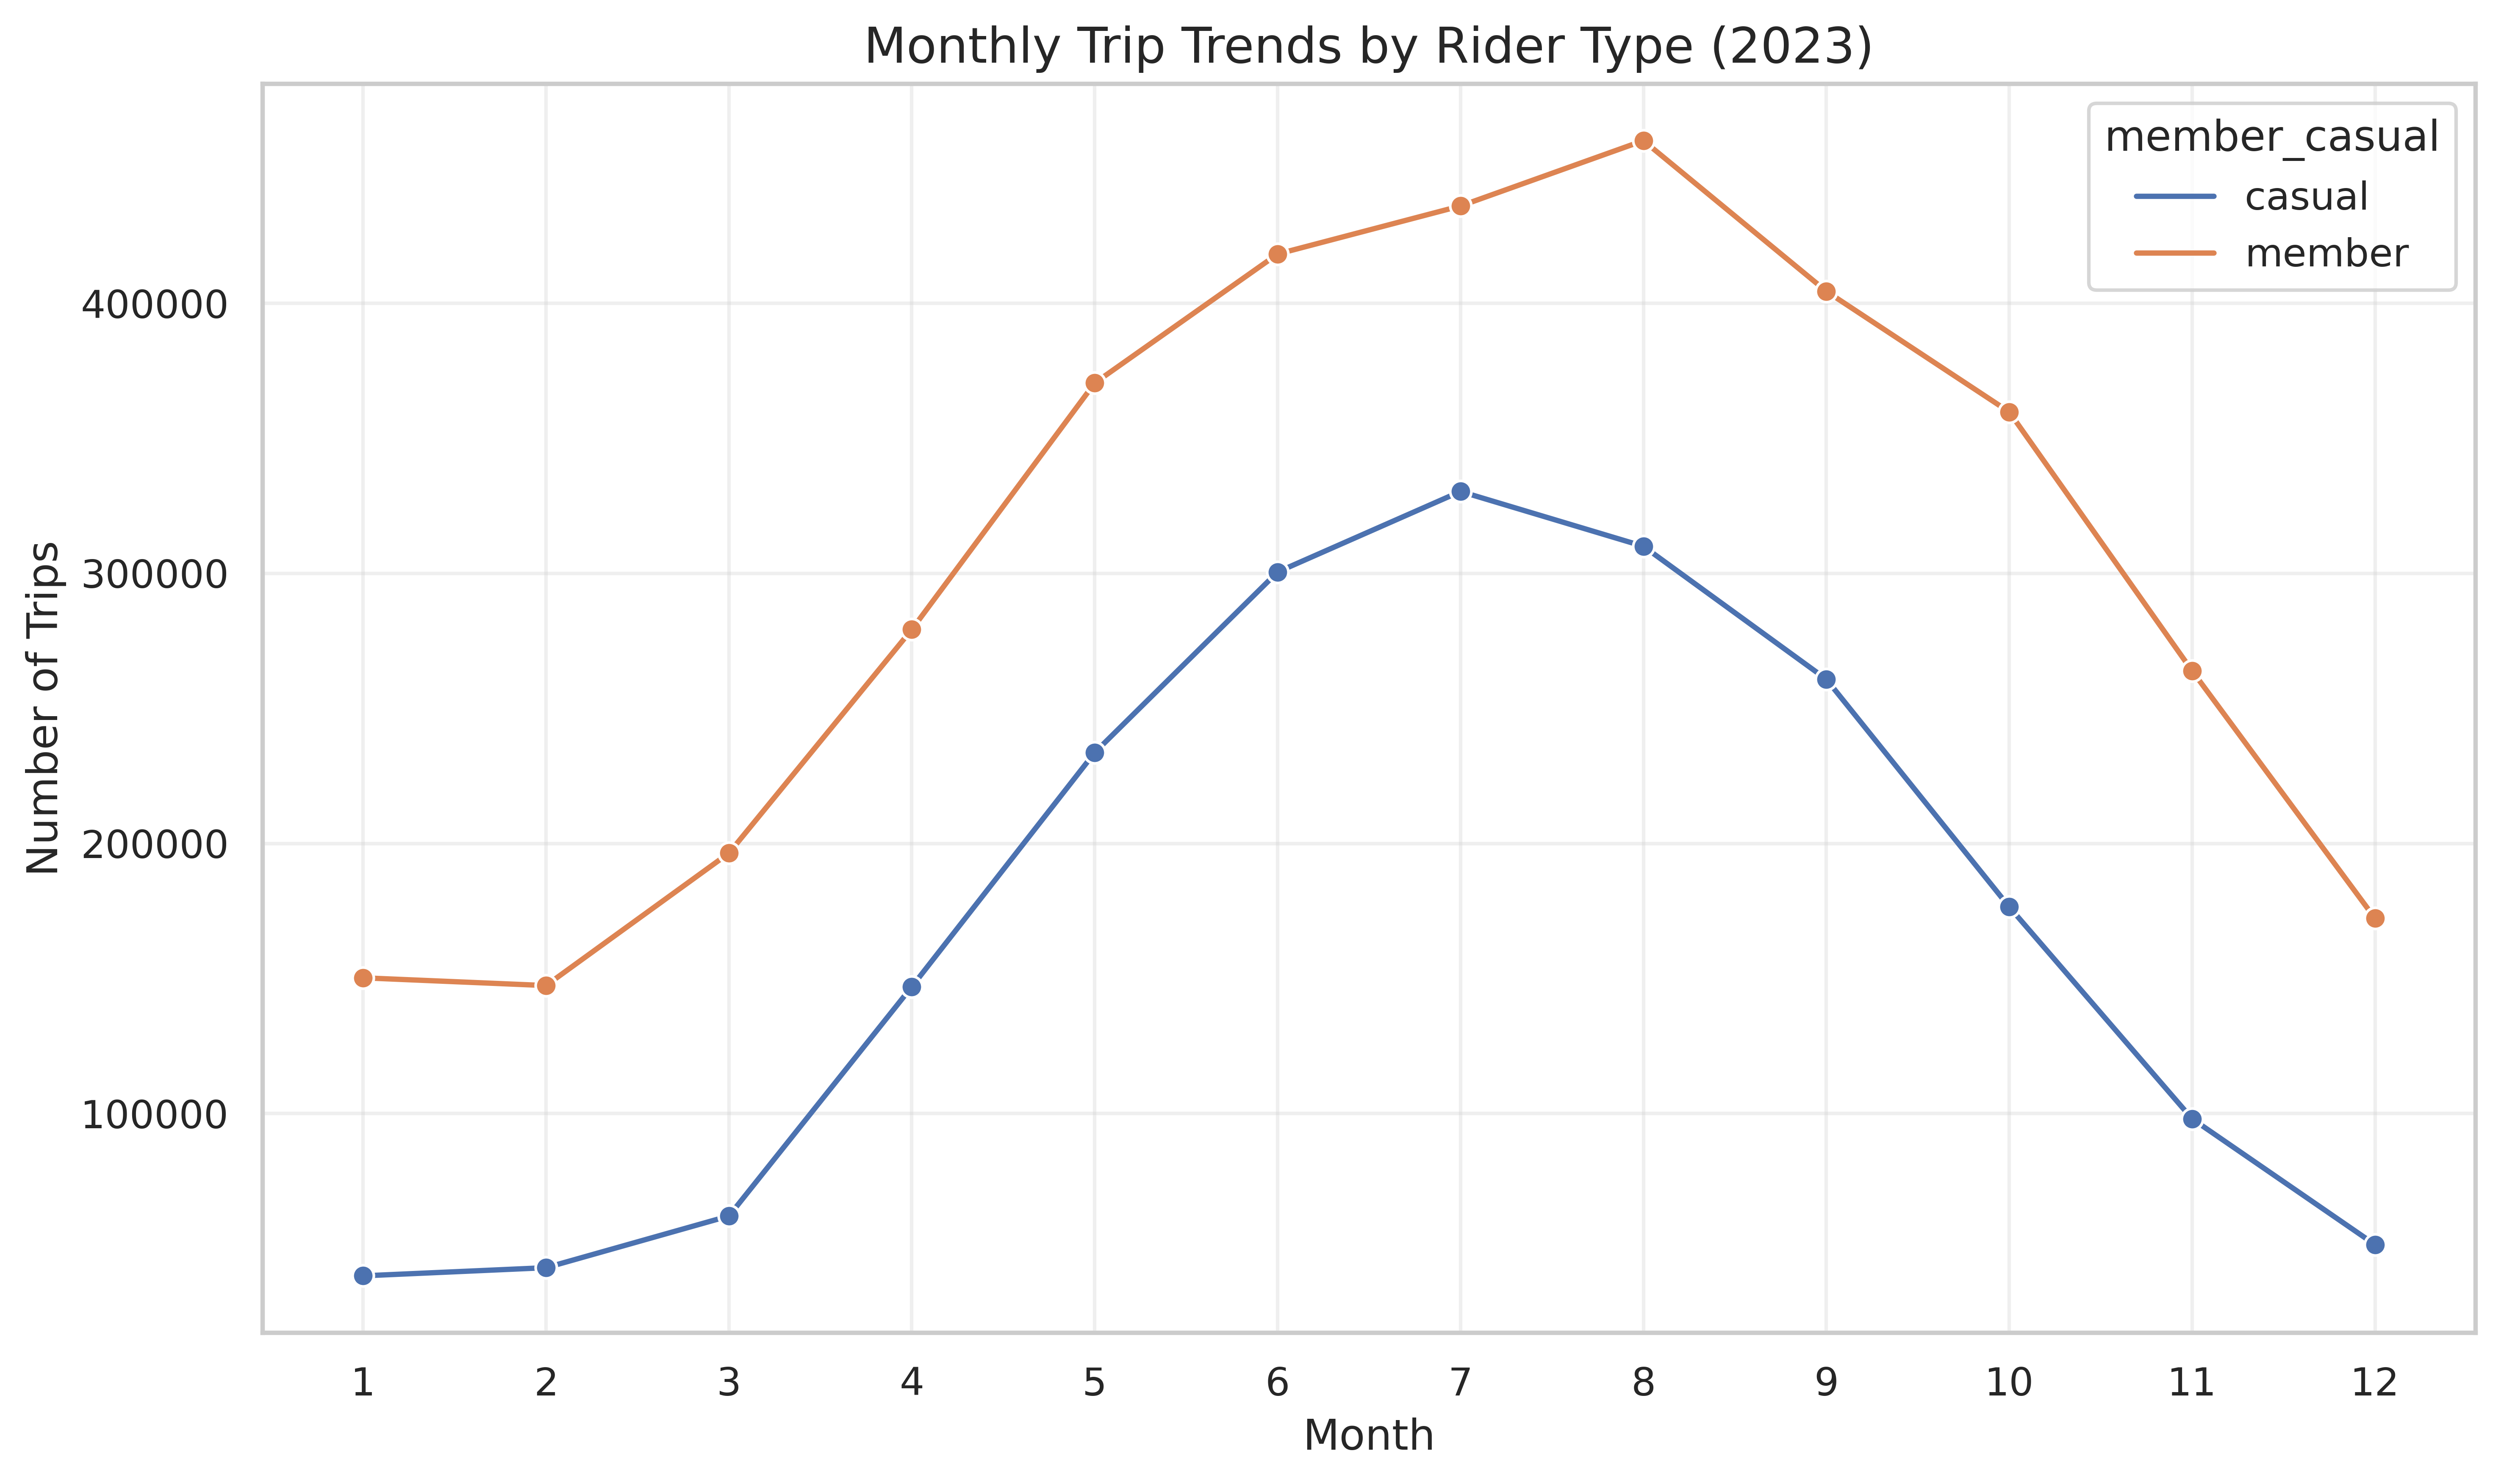

In [103]:
sns.lineplot(
    data=df_month,
    x="trip_month",
    y="count",
    hue="member_casual",
    marker="o"
)

plt.title("Monthly Trip Trends by Rider Type (2023)")
plt.xlabel("Month")
plt.ylabel("Number of Trips")
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

/home/suanto/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/suanto/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


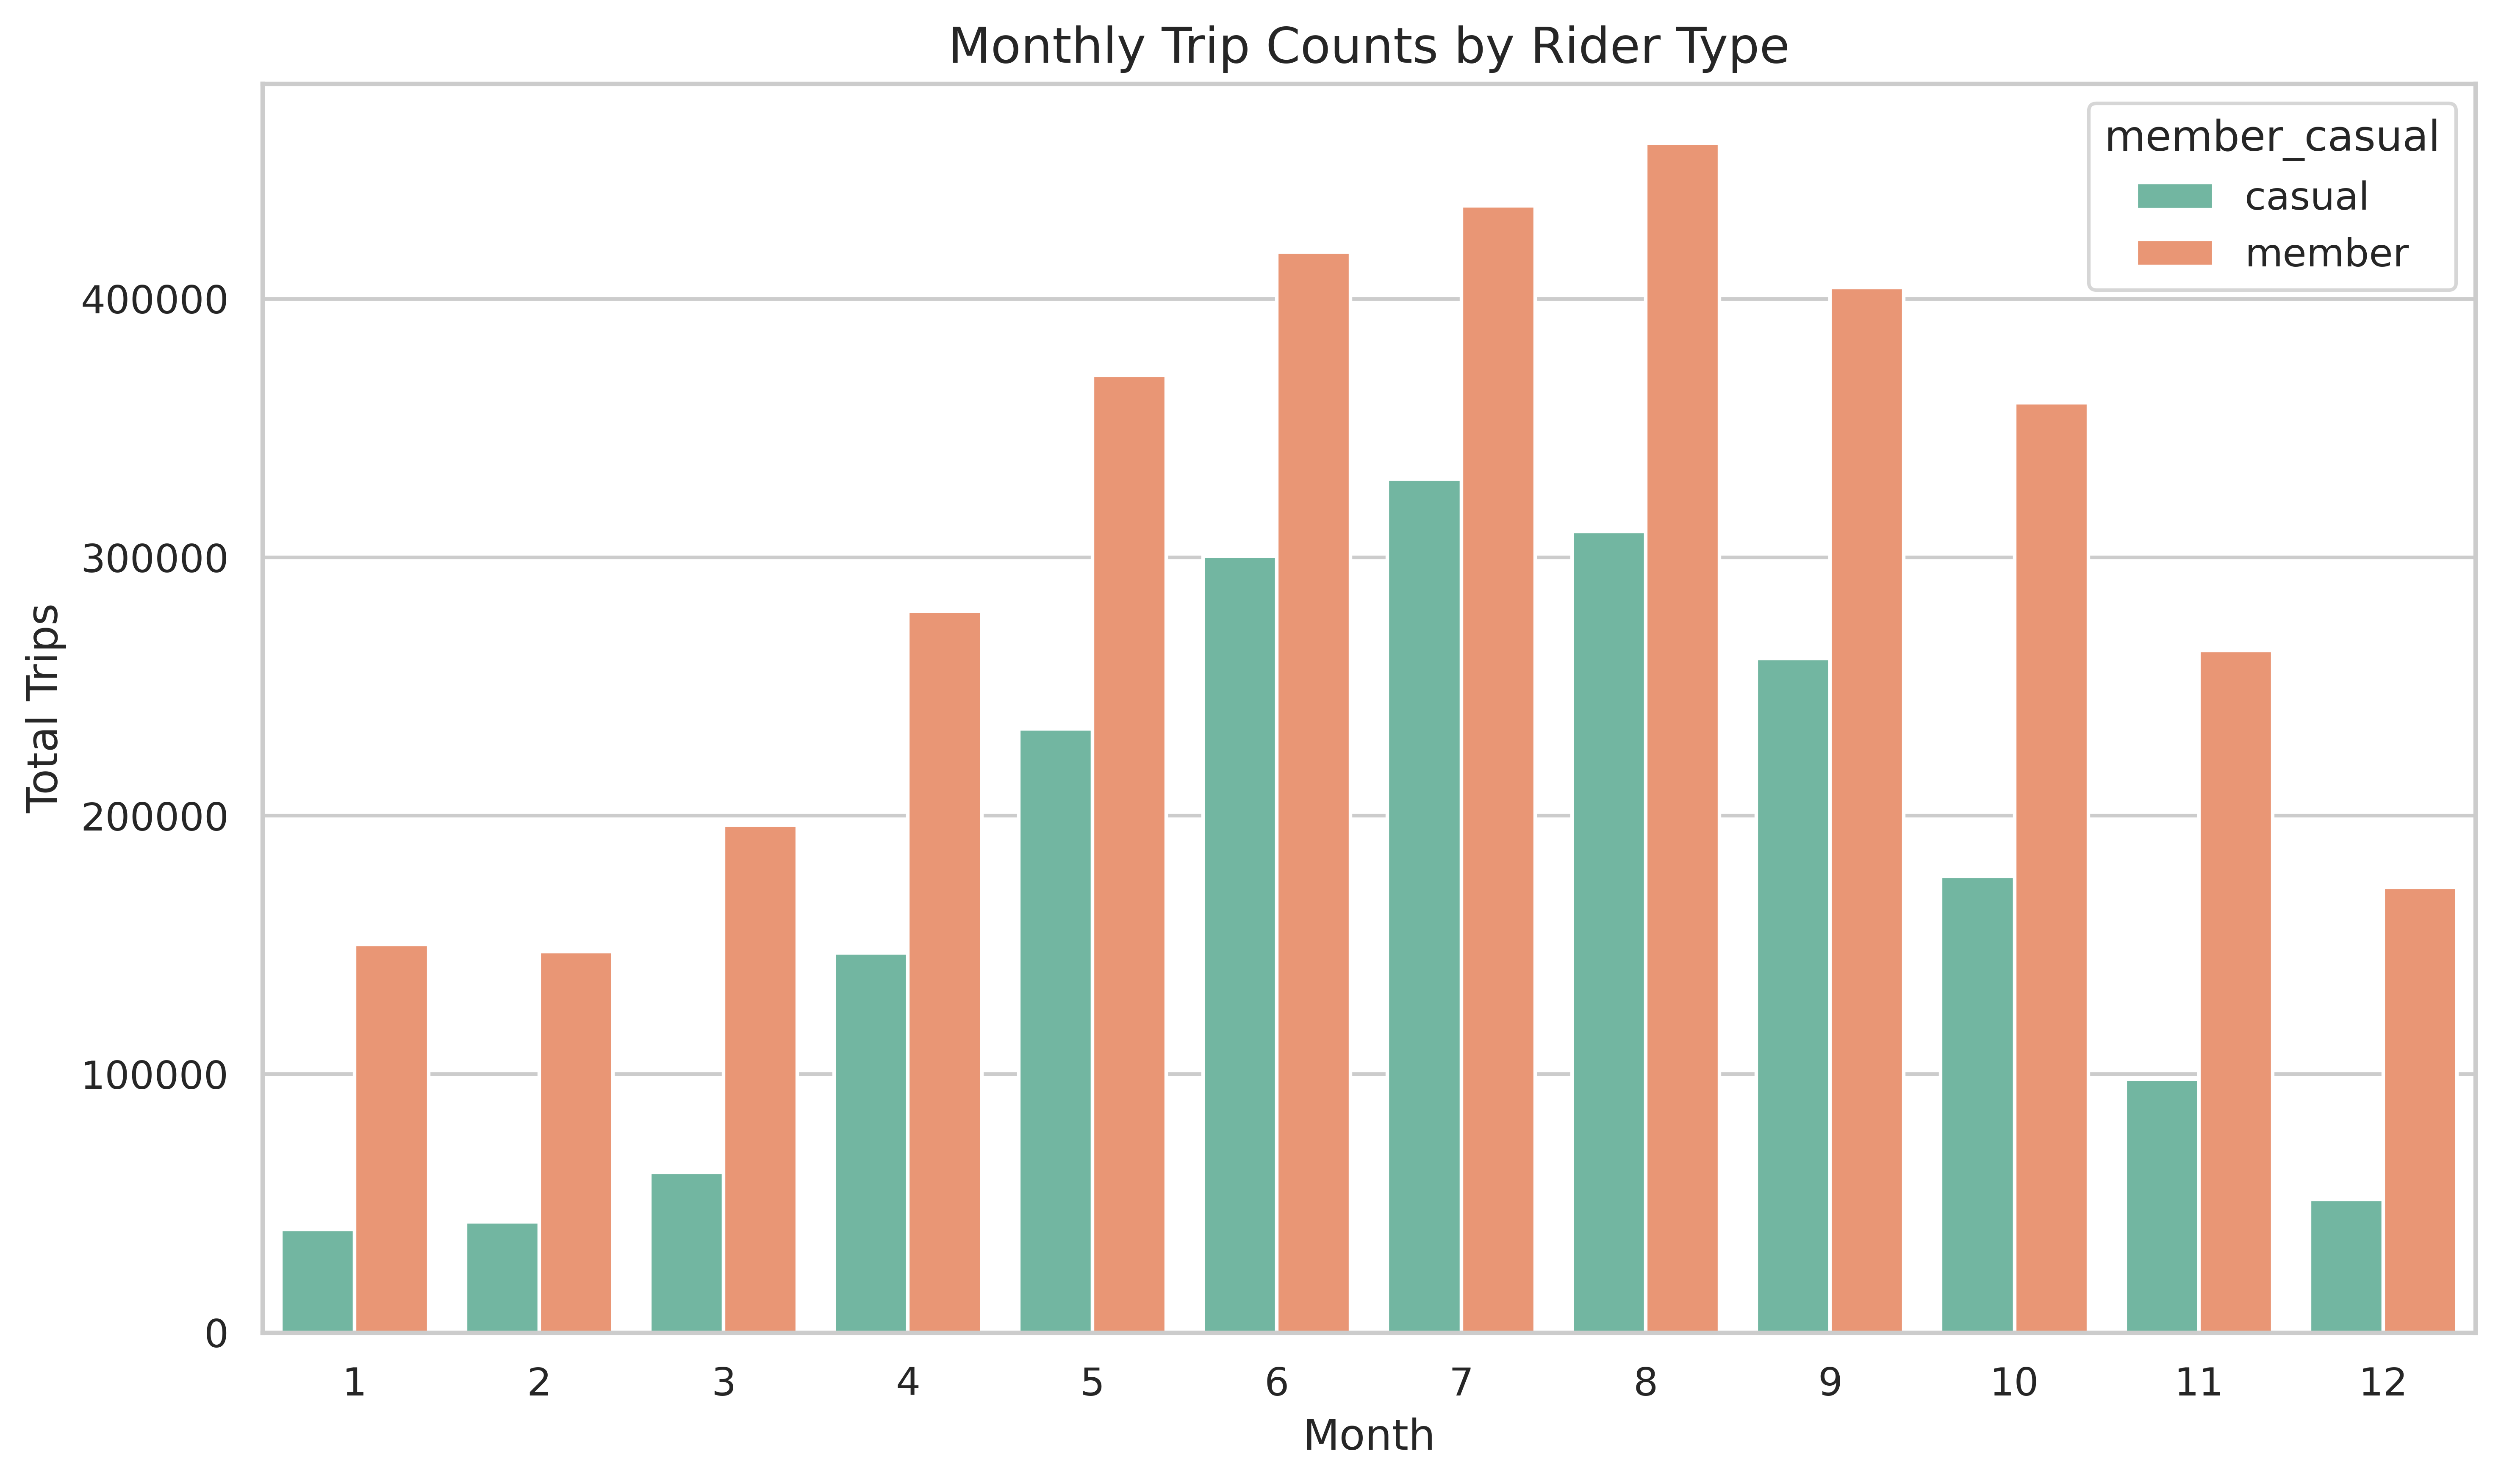

In [104]:
sns.barplot(
    data=df_month,
    x="trip_month",
    y="count",
    hue="member_casual",
    palette="Set2"
)

plt.title("Monthly Trip Counts by Rider Type")
plt.xlabel("Month")
plt.ylabel("Total Trips")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [112]:
df_overall = pd.read_csv("6_1_most_popular_start_stations_overall.csv")

df_overall = df_overall.dropna(subset=["start_station_name"])

df_overall

start_station_name  count
1             Streeter Dr & Grand Ave  63026
2   DuSable Lake Shore Dr & Monroe St  40142
3               Michigan Ave & Oak St  37308
4  DuSable Lake Shore Dr & North Blvd  35903
5                   Clark St & Elm St  35776
6            Kingsbury St & Kinzie St  34931
7               Wells St & Concord Ln  33563
8        Clinton St & Washington Blvd  32681
9                   Wells St & Elm St  30370

In [113]:
df_overall = df_overall.sort_values("count", ascending=True)

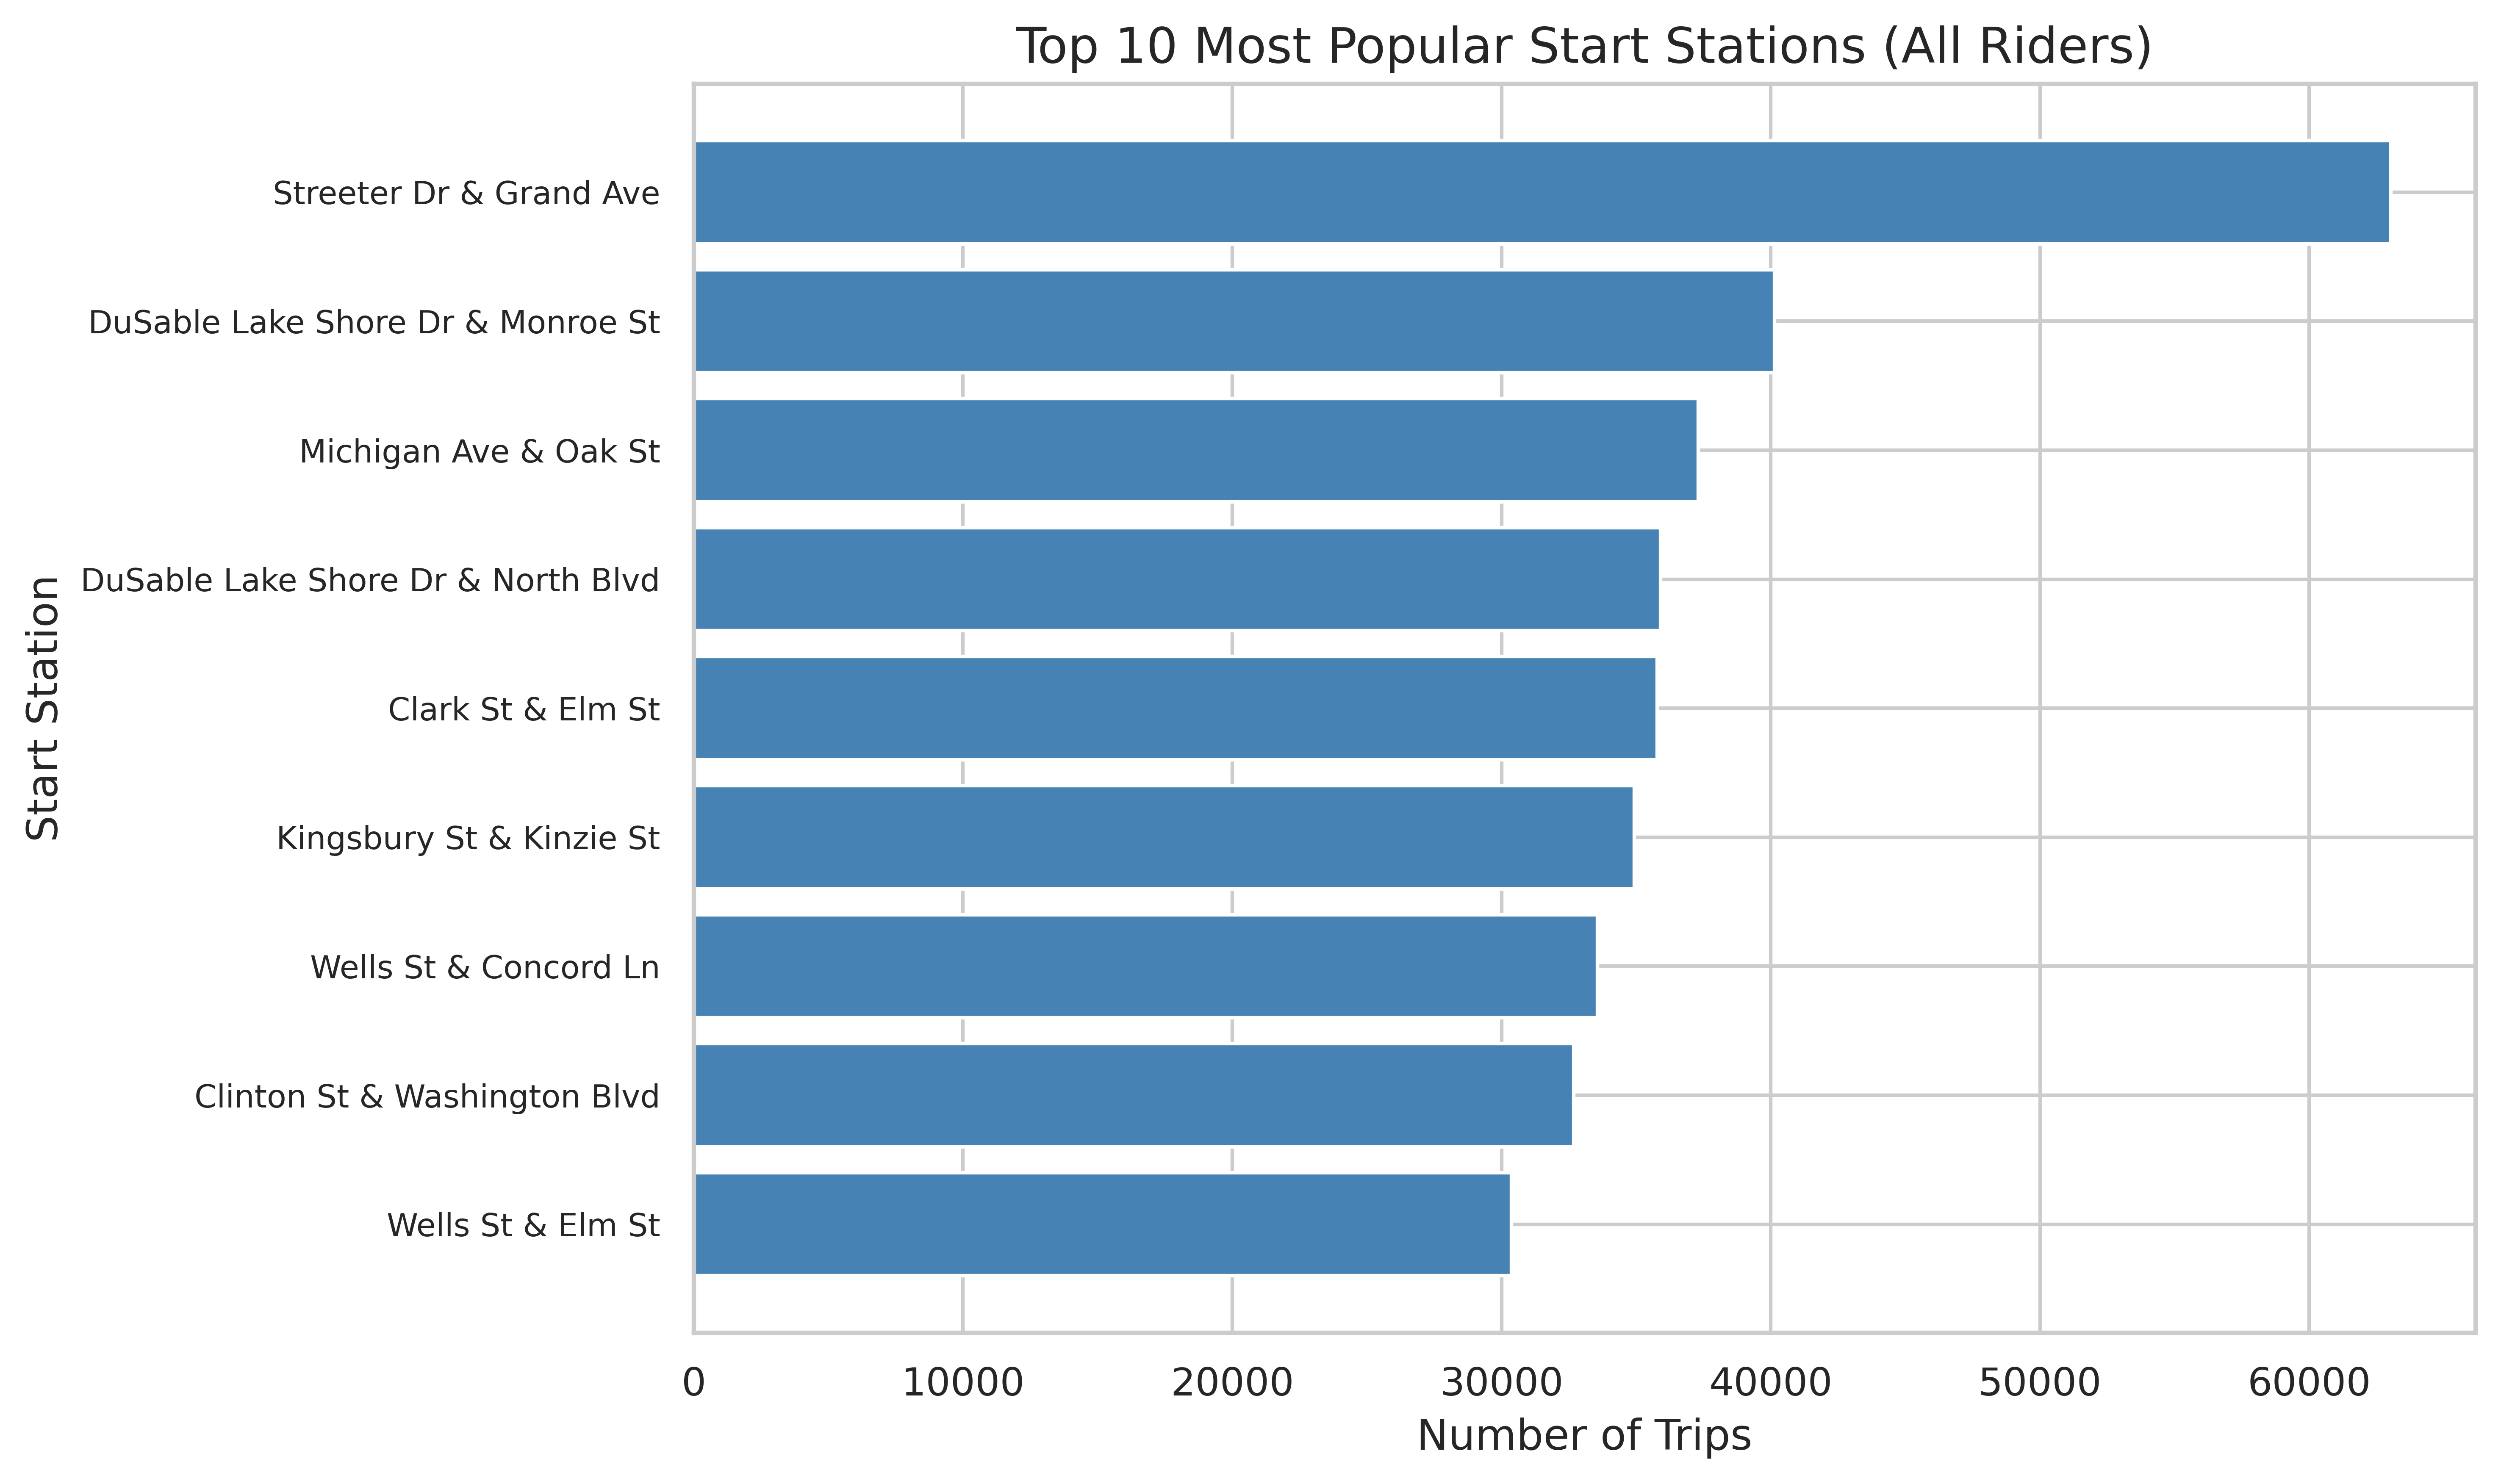

In [115]:
plt.barh(
    df_overall["start_station_name"],
    df_overall["count"],
    color="steelblue"
)

plt.title("Top 10 Most Popular Start Stations (All Riders)", fontsize=14)
plt.xlabel("Number of Trips")
plt.ylabel("Start Station")
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()

In [117]:
df_members = pd.read_csv("6_2_most_popular_among_member.csv")
df_members = df_members.dropna(subset=["start_station_name"])
df_members.head()


start_station_name  count
1  Clinton St & Washington Blvd  26200
2      Kingsbury St & Kinzie St  26157
3             Clark St & Elm St  24991
4         Wells St & Concord Ln  21412
5       Clinton St & Madison St  20589

In [118]:
df_members = df_members.sort_values("count", ascending=True)

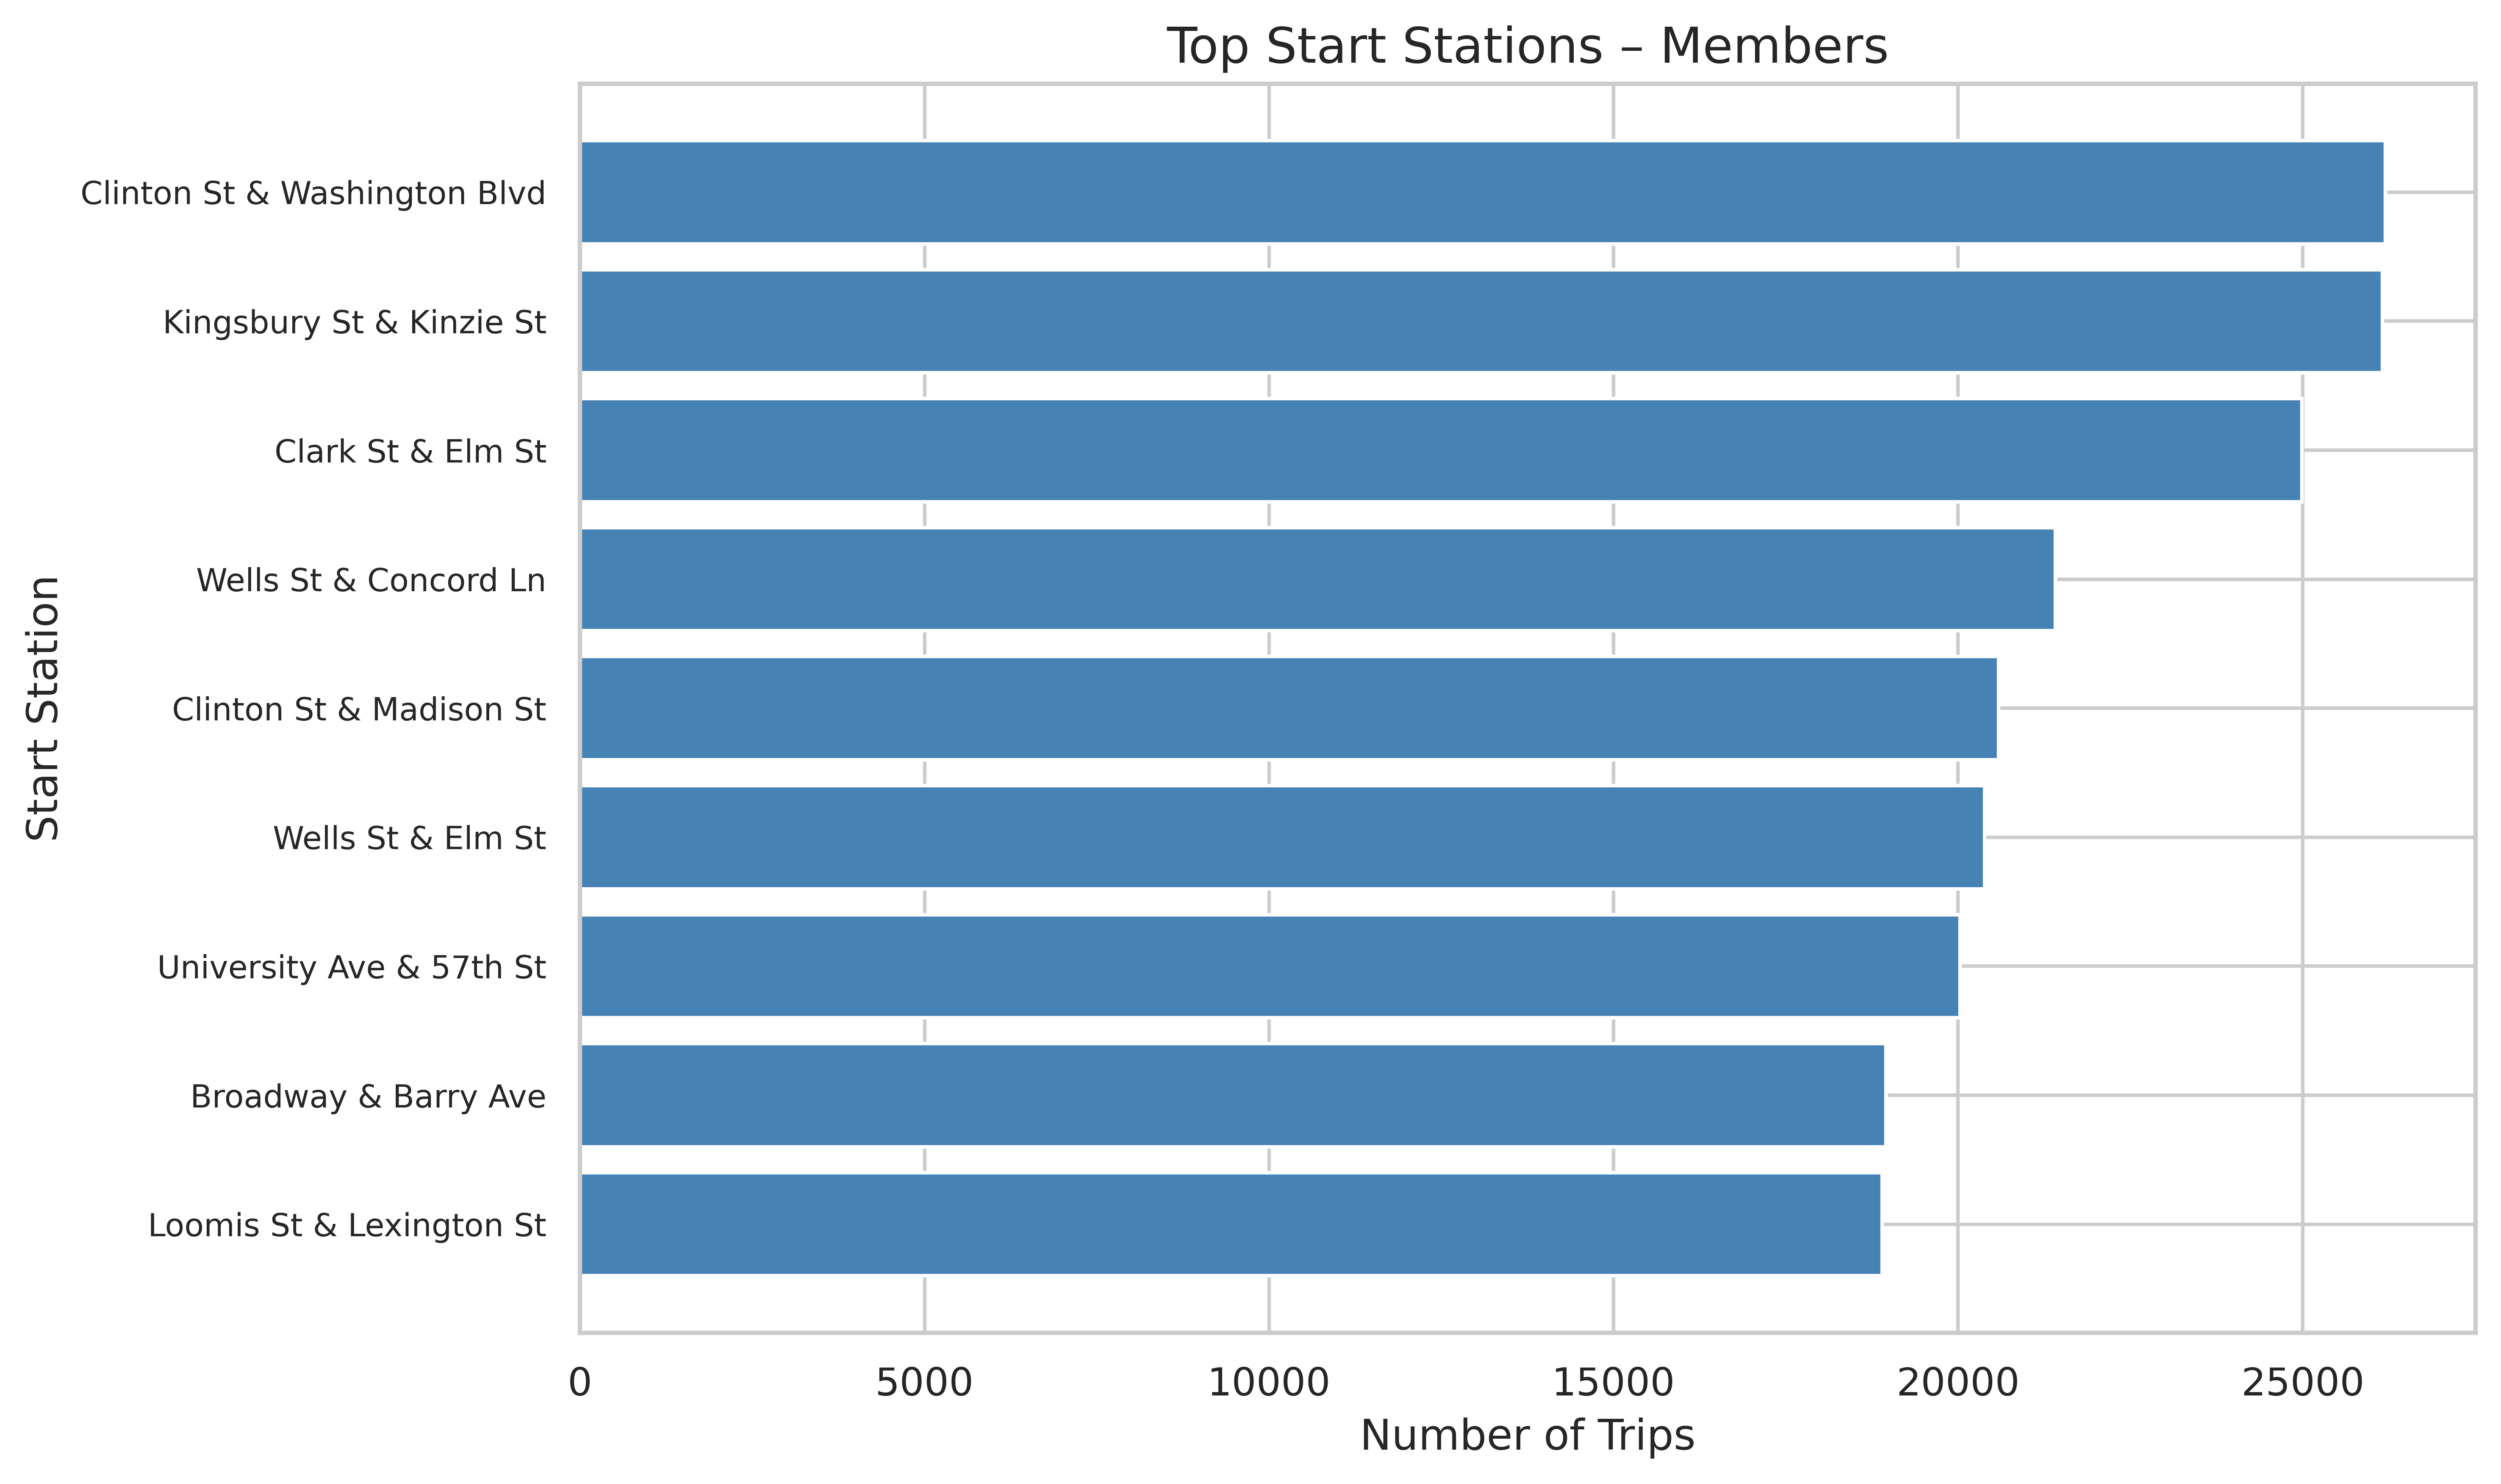

In [120]:
plt.barh(
    df_members["start_station_name"],
    df_members["count"],
    color="steelblue"
)

plt.title("Top Start Stations – Members", fontsize=14)
plt.xlabel("Number of Trips")
plt.ylabel("Start Station")
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()

In [122]:
df_casual = pd.read_csv("6_3_most_popular_among_casual_riders.csv")
df_casual = df_casual.dropna(subset=["start_station_name"])
df_casual.head()

start_station_name  count
1             Streeter Dr & Grand Ave  45818
2   DuSable Lake Shore Dr & Monroe St  30347
3               Michigan Ave & Oak St  22595
4  DuSable Lake Shore Dr & North Blvd  20290
5                     Millennium Park  20092

In [123]:
df_casual = df_casual.sort_values("count", ascending=True)

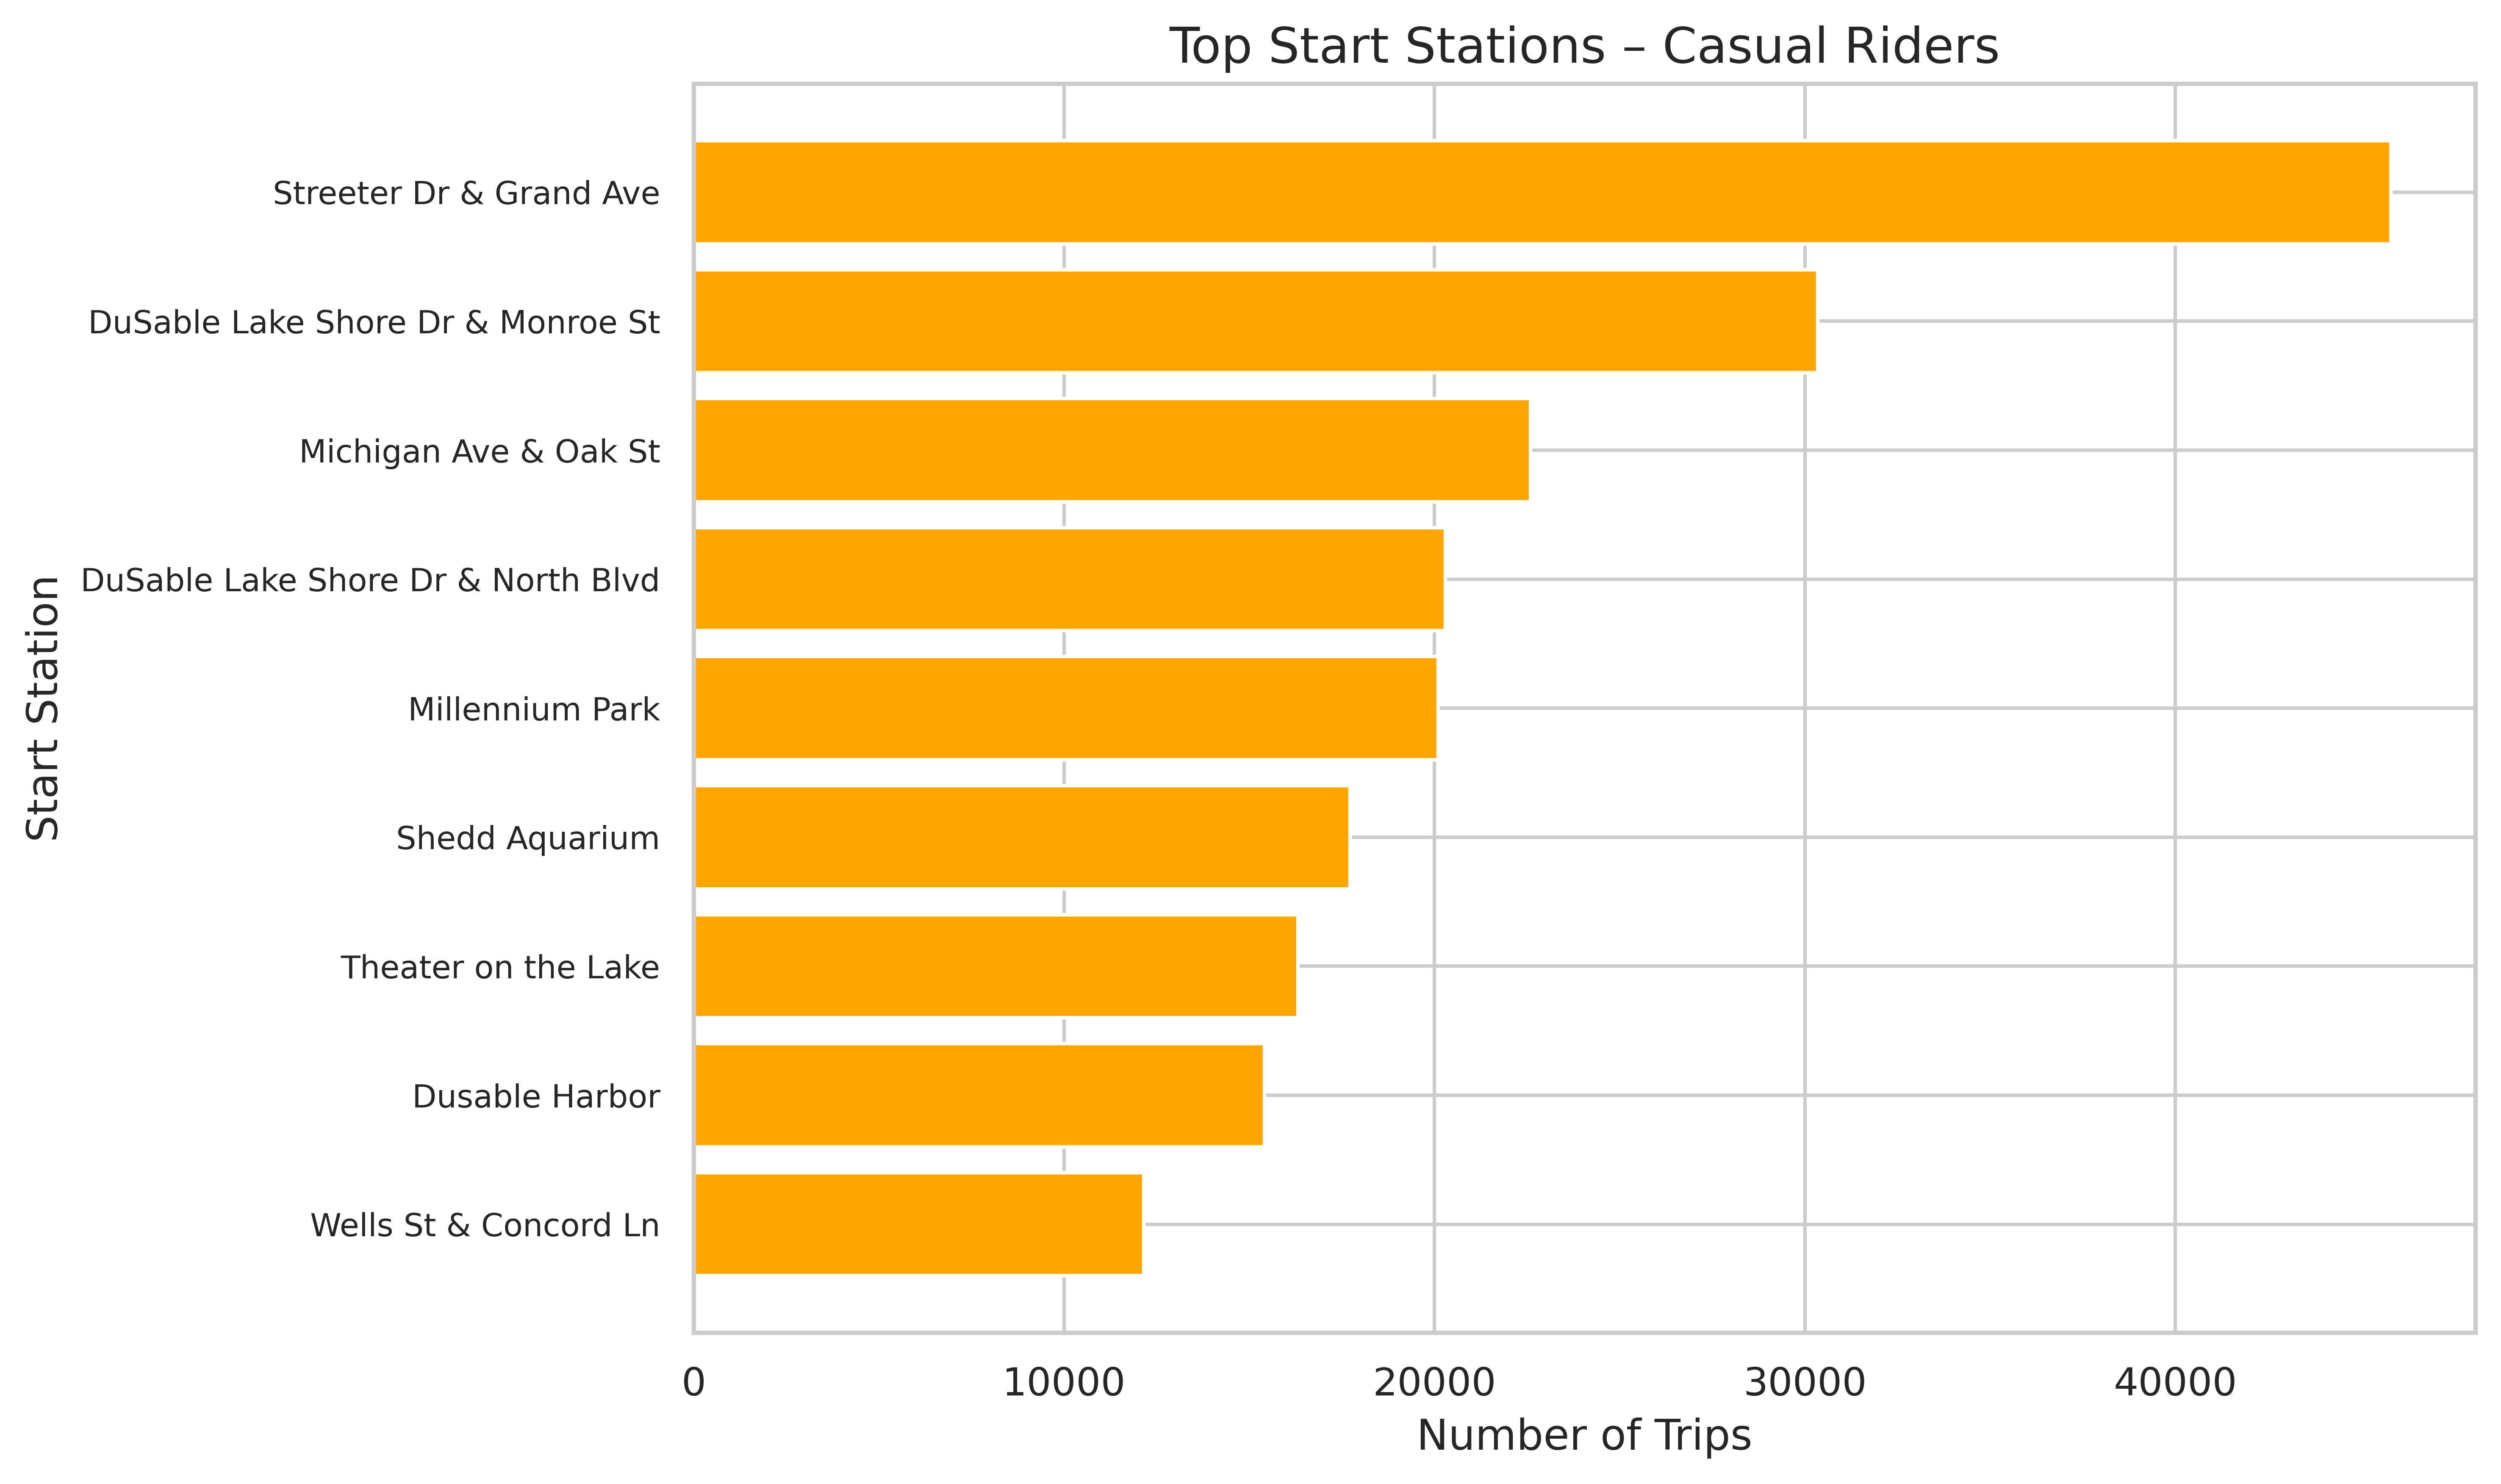

In [125]:
plt.barh(
    df_casual["start_station_name"],
    df_casual["count"],
    color="orange"
)

plt.title("Top Start Stations – Casual Riders", fontsize=14)
plt.xlabel("Number of Trips")
plt.ylabel("Start Station")
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()